# Laplacian Spectrum and entropy

## (1) Lenguas de la Américas
### Extraemos las lenguas de América del Sur y de América del Norte desde los datos de Glottolog
### https://glottolog.org/meta/downloads

In [1]:
## usamos pandas para leer .csv

import pandas as pd 

In [2]:
## clasificación por macroárea 

macroarea = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [3]:
## borramos donde no hay datos (NaN)

macroarea.dropna(inplace = True)

In [4]:
## nos quedamos con un dataframe con dos columnas: iso vs macroárea

macroarea = macroarea[['isocodes','macroarea']]

In [5]:
## transformamos los datos en un diccionario iso:macroarea
## filtramos por macroarea 'South America' y 'North America'

macroarea = dict(zip(macroarea['isocodes'], macroarea['macroarea']))
macroarea = {language:macroarea[language] for language in macroarea.keys() if macroarea[language] in ['South America', 'Australia', 'Papunesia', 'Africa', 'Eurasia', 'North America']}

In [6]:
## ¿cuántas lenguas tenemos?

print('número de lenguas: '+str(len(macroarea.keys())))

número de lenguas: 7690


In [7]:
## de este conjunto de 1208 lenguas, filtramos las que están en el corpus UDHR
## https://www.unicode.org/udhr/index.html

languages={}

for language in list(macroarea.keys()):
    #with open('udhr_' + language + '.txt', 'r', encoding='utf-8') as file:
    try: 
        file = open('udhr/'+'udhr_'+language+'.txt', 'r')  
        language_text=file.read().split('\n')
        languages[language]=[line.strip() for line in language_text]
        languages[language]=[line for line in languages[language] if len(line)>0]
    except FileNotFoundError:
        pass

In [8]:
## nuevo número de lenguas :)

print(len(languages))

362


In [9]:
## mapudungun :)
## solo imprimimos los primeros 10 elementos de la lista

languages['arn'][:10]

['Universal Declaration of Human Rights - Mapudungun',
 '© 1996 – 2009 The Office of the High Commissioner for Human Rights',
 'This plain text version prepared by the “UDHR in Unicode”',
 'project, https://www.unicode.org/udhr.',
 '---',
 'Kom Mapu Fijke Az Tañi Az Mogeleam',
 'Tuwvlzugun',
 '("Preámbulo" pi ta wigka)',
 'Kimnieel fij mapu mew tañi kimgen kvme felen kisugvnew felen xvr kvme mvlen. Tvfaci zugu ñi mvleken mvleyem yamvwvn ka xvr kvme nor felen kom pu reñmawke ce mew.',
 'Gewenonmu yamuwvn, zuamgewenonmu kvme felen, goymagenmu nor felen mvley re jazkvnkawvn: Fey mew mvley xvrvmzugu kom pu ce tañi kvme mogeleam kisuke ñi feyentun mew, kisu ñi rakizuam mew ka ñi wimtun mew ñi mvleal egvn.']

### Descripción del corpus

In [10]:
## dos funciones que permiten "limpiar" los datos con el fin de construir redes.
## la primera tokeniza strings. Usamos como definición de palabra como la cadena de caracteres entre dos espacios en blanco. 
## la segunda (i) elimina símbolos raros, elimina espacios vacíos, elimina números y remueve los encabezados

def tokenize(s):
    return s.split(' ')

def clean(L):
    language=languages[L]
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    language=[list(filter(None, [w.lower().translate(table) for w in tokenize(sentence)])) for sentence in language if len([w.lower() for w in [w.translate(table) for w in tokenize(sentence)]])>0]
    language=[[w for w in s if w!="''"] for s in language] 
    language=[[w for w in s if w!='̃'] for s in language] 
    language=[[w for w in s if not w.isdigit()] for s in language]
    if L=='zro':
        return language[6:]
    elif L=='tca':
        return language[7:]
    elif L=='gyr':
        return language[9:]
    else:
        return language[5:]

In [11]:
## aplicamos las funciones anteriores.

clean_languages={}
for language in languages:
    clean_languages[language]=clean(language)

In [12]:
## para cada ejemplo, mostramos cómo queda la primera oración. 

for language in clean_languages.keys():
    print(language, clean_languages[language][0])

abk ['ауаҩытәыҩса', 'изинқәа', 'зегьеицырзеиҧшу', 'адекларациа']
ace ['assalammualaikum', 'meunan', 'ulon', 'kheun', 'wate', 'bie', 'saleum', 'meurumpok', 'gata', 'wa', 'alaikum', 'salam', 'balaih', 'gata', 'kheun', 'geutanyoe', 'taseunyom', 'rumeh', 'lagoina', 'lon', 'puphon', 'lajue', 'meukeusud', 'ulon', 'keunoe', 'ulon', 'tron', 'meurumpok', 'gata', 'lon', 'peutrok', 'haba', 'suai', 'paleng', 'phon', 'peunyataan', 'umum', 'hak‐hak', 'asasi', 'manusia', 'tiep', 'ureung', 'lahee', 'dengon', 'hak‐hak', 'drou', 'kareuna', 'geutanyo', 'bangsa', 'manusia', 'hak‐hak', 'muteulak', 'nyang', 'saban', 'keu', 'barangso', 'jih', 'lon', 'ngon', 'gata', 'droe', 'sama', 'mulia', 'peusyarikatan', 'bangsa‐bangsa', 'pbb', 'kana', '“komitmen”', 'meunan', 'keuh', 'dikheun', 'lee', 'awak', 'lua', 'dijunjong', 'diseu‐on', 'dilindong', 'dipeutheun', 'peunyuloh', 'ureung', 'haroik', 'merdeka', 'pane', '“komitmen”', 'bak', 'awai', 'phon', 'puteh', 'licen', 'lon', 'neulop', 'sion‐on', 'piagam', 'peusyarikata

In [13]:
## contamos palabras 

from collections import Counter

words_entropy={}
words={}
mean_tokens={}
mean_types={}
for language in clean_languages.keys():
    words_entropy[language]=[item for sublist in clean_languages[language] for item in sublist]
    words[language]=[len([item for sublist in clean_languages[language] for item in sublist]),len(set([item for sublist in clean_languages[language] for item in sublist])),Counter([item for sublist in clean_languages[language] for item in sublist])]
    mean_tokens[language]=len([item for sublist in clean_languages[language] for item in sublist])
    mean_types[language]=len(set([item for sublist in clean_languages[language] for item in sublist]))
    print(language,len(clean_languages[language]),len([item for sublist in clean_languages[language] for item in sublist]),len(set([item for sublist in clean_languages[language] for item in sublist])))

abk 91 1294 750
ace 93 1906 709
acu 92 1676 559
ada 93 2882 344
ady 92 1195 716
afr 91 1656 470
agr 90 1811 827
ajg 92 2031 571
amc 87 1496 672
amr 93 1407 421
qva 92 1715 762
amh 82 83 83
ami 92 1546 407
njo 103 1396 513
arl 94 1973 530
qxu 94 1124 542
cni 92 1305 515
prq 75 626 258
aii 89 1130 503
ast 93 1871 643
kwi 202 1294 733
quy 93 1279 645
bba 91 1907 477
ban 94 1711 595
rmn 93 1665 641
bam 91 1632 482
bax 91 2254 507
bci 90 2892 439
bfa 82 2011 433
eus 93 1348 669
bel 93 1640 742
bem 90 1362 658
ben 95 1383 638
btb 90 1160 371
bho 91 1703 536
bin 104 2784 478
bis 91 2310 344
qug 239 1409 702
boa 96 1567 704
gax 94 1410 557
nku 88 1074 228
bre 94 1845 586
bug 94 1752 614
bul 91 1737 618
mya 91 1188 865
qvc 90 1153 599
qud 91 933 456
cbu 91 1290 574
cot 94 1532 715
hns 94 2221 490
cbr 92 2204 542
cbs 76 626 258
cat 92 1800 570
ceb 91 1868 482
ayr 91 925 610
dga 93 2552 356
knc 102 1320 692
khm 92 549 462
ckb 90 1644 602
maz 91 1544 310
tzm 92 1783 647
ccp 94 1414 680
cha 92 1915

In [14]:
type_token = {}

for language in clean_languages.keys():
    type_token[language]=mean_types[language]/float(mean_tokens[language])

In [15]:
type_token

{'abk': 0.5795981452859351,
 'ace': 0.3719832109129066,
 'acu': 0.33353221957040574,
 'ada': 0.1193615544760583,
 'ady': 0.599163179916318,
 'afr': 0.28381642512077293,
 'agr': 0.45665378244064053,
 'ajg': 0.2811422944362383,
 'amc': 0.44919786096256686,
 'amr': 0.2992181947405828,
 'qva': 0.4443148688046647,
 'amh': 1.0,
 'ami': 0.2632600258732212,
 'njo': 0.3674785100286533,
 'arl': 0.26862645717181954,
 'qxu': 0.4822064056939502,
 'cni': 0.3946360153256705,
 'prq': 0.41214057507987223,
 'aii': 0.4451327433628319,
 'ast': 0.3436664885088188,
 'kwi': 0.5664605873261206,
 'quy': 0.5043002345582487,
 'bba': 0.25013109596224437,
 'ban': 0.347749853886616,
 'rmn': 0.384984984984985,
 'bam': 0.29534313725490197,
 'bax': 0.22493345164152617,
 'bci': 0.15179806362378975,
 'bfa': 0.21531576330183988,
 'eus': 0.49629080118694363,
 'bel': 0.4524390243902439,
 'bem': 0.4831130690161527,
 'ben': 0.4613159797541576,
 'btb': 0.31982758620689655,
 'bho': 0.3147386964180857,
 'bin': 0.171695402298850

In [16]:
from collections import Counter

In [17]:
distributions={}
for language in clean_languages.keys():
    distributions[language]=list(dict(Counter(words_entropy[language])).values())

In [18]:
entropy = pd.read_csv('entropy.csv',sep=',')

In [19]:
## filtramos la entropía por el estimador H_NSB (como una primera aproximación)

entropy = entropy[['iso','H_NSB']]
entropy = entropy.dropna()

In [20]:
## creamos un diccionario iso:entropy
## filtramos por iso in status.keys()

entropy = dict(zip(entropy['iso'], entropy['H_NSB']))
entropy = {language:entropy[language] for language in entropy.keys() if language in clean_languages.keys()}

In [21]:
len(entropy)

325

## (2) Laplacian Spectrum
### Usamos redes para extraer rasgos de lenguas de las Américas. Nuestros rasgos son los valores propios de la matriz de adyacencia de los grafos (en principio)
### https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors

In [22]:
## famosa librería de redes
import networkx as nx

In [124]:
## grafos: para cada texto, recorremos sus oraciones y en cada una buscamos pares de palabras adyacentes

def GoW(text_clean,radius=3):
    ## partimos con un grafo vacío (sin nodos o aristas)
    G=nx.Graph()
    ## recorremos las oraciones
    for sentence in text_clean:
        ## si tiene al menos dos palabras
        if len(sentence)>1:
            ## en "pairs" guardamos momentáneamente los pares de palabras adyacentes
            pairs=[]
            ## usamos un radio, que fijamos inicialmente en 1
            for r in list(range(1,radius+1)):
                ## usamos zip para crear bigramas
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                ## si una arista no está la agregamos
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                #else:
                #    x=G[pair[0]][pair[1]]['weight']
                #    G[pair[0]][pair[1]]['weight']=x+1
    
    return G

In [125]:
## calculamos los grafos

graphs={}
for language in languages.keys():
    #print(language)
    G=GoW(clean_languages[language])
    graphs[language]=G

In [126]:
import pickle

pickle.dump(graphs,open('graphs.p','wb'))

In [127]:
len(graphs)

362

In [128]:
## ahora extraemos los valores propios
## usamos la matriz laplaciana normalizada
## https://en.wikipedia.org/wiki/Laplacian_matrix
from numpy import linalg as LA
import numpy as np

from scipy.linalg import eigvalsh

def spectrum(G):
    M=nx.normalized_laplacian_matrix(G,weight='weight').todense()
    eigs=LA.eigvals(M)
    return eigs

In [129]:
## guardamos el espectro usando la función anterior

spectrum_languages={}

for language in graphs.keys():
    #print(language)
    G=graphs[language]
    if len(G)>0 and type_token[language]<1:
        spectrum_languages[language]=sorted([np.real(n) for n in spectrum(G)])

## (3) Familias lingüísticas
### Extraemos de Glottolog la información de las familias lingüísticas de las Américas. Para acceder automáticamente a esa información, usamos la librería lang2vec https://github.com/antonisa/lang2vec

In [130]:
## instalación de lang2vec con pip

!pip3 install lang2vec

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [131]:
## llamamos la librería

import lang2vec.lang2vec as l2v

In [132]:
## familias según Glottolog
## esta parte se demora un poco, asi que guardamos los datos en la celda siguiente

#families=l2v.get_features('arn', "fam",header=True)['CODE']

#families_languages={language:[] for language in [L for L in languages.keys() if L in l2v.LANGUAGES]}

#for language in families_languages.keys():
#    fam = l2v.get_features(language, "fam")
#    if 1 in fam[language]:
#        indexes = np.where(np.array(fam[language]) == 1)[0]
#        for ii in indexes:
#            families_languages[language]+=[families[ii]]

In [133]:
## guardamos usando pickle

#import pickle

#pickle.dump(families_languages,open('families_languages.p','wb'))

In [134]:
import pickle

families_languages = pickle.load(open('families_languages.p','rb'))

In [135]:
## familias lingüísticas

family = {key:families_languages[key][0][2:] for key in families_languages.keys() if len(families_languages[key])>0}

In [136]:
#family

In [137]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(family.items()):
    v[value].append(key)

In [138]:
v = dict(v)

In [139]:
#v

In [140]:
pickle.dump(v,open('families_languages_sim.p','wb'))

In [141]:
## librerías para graficar

import matplotlib.pyplot as plt

### Lenguas de las Américas

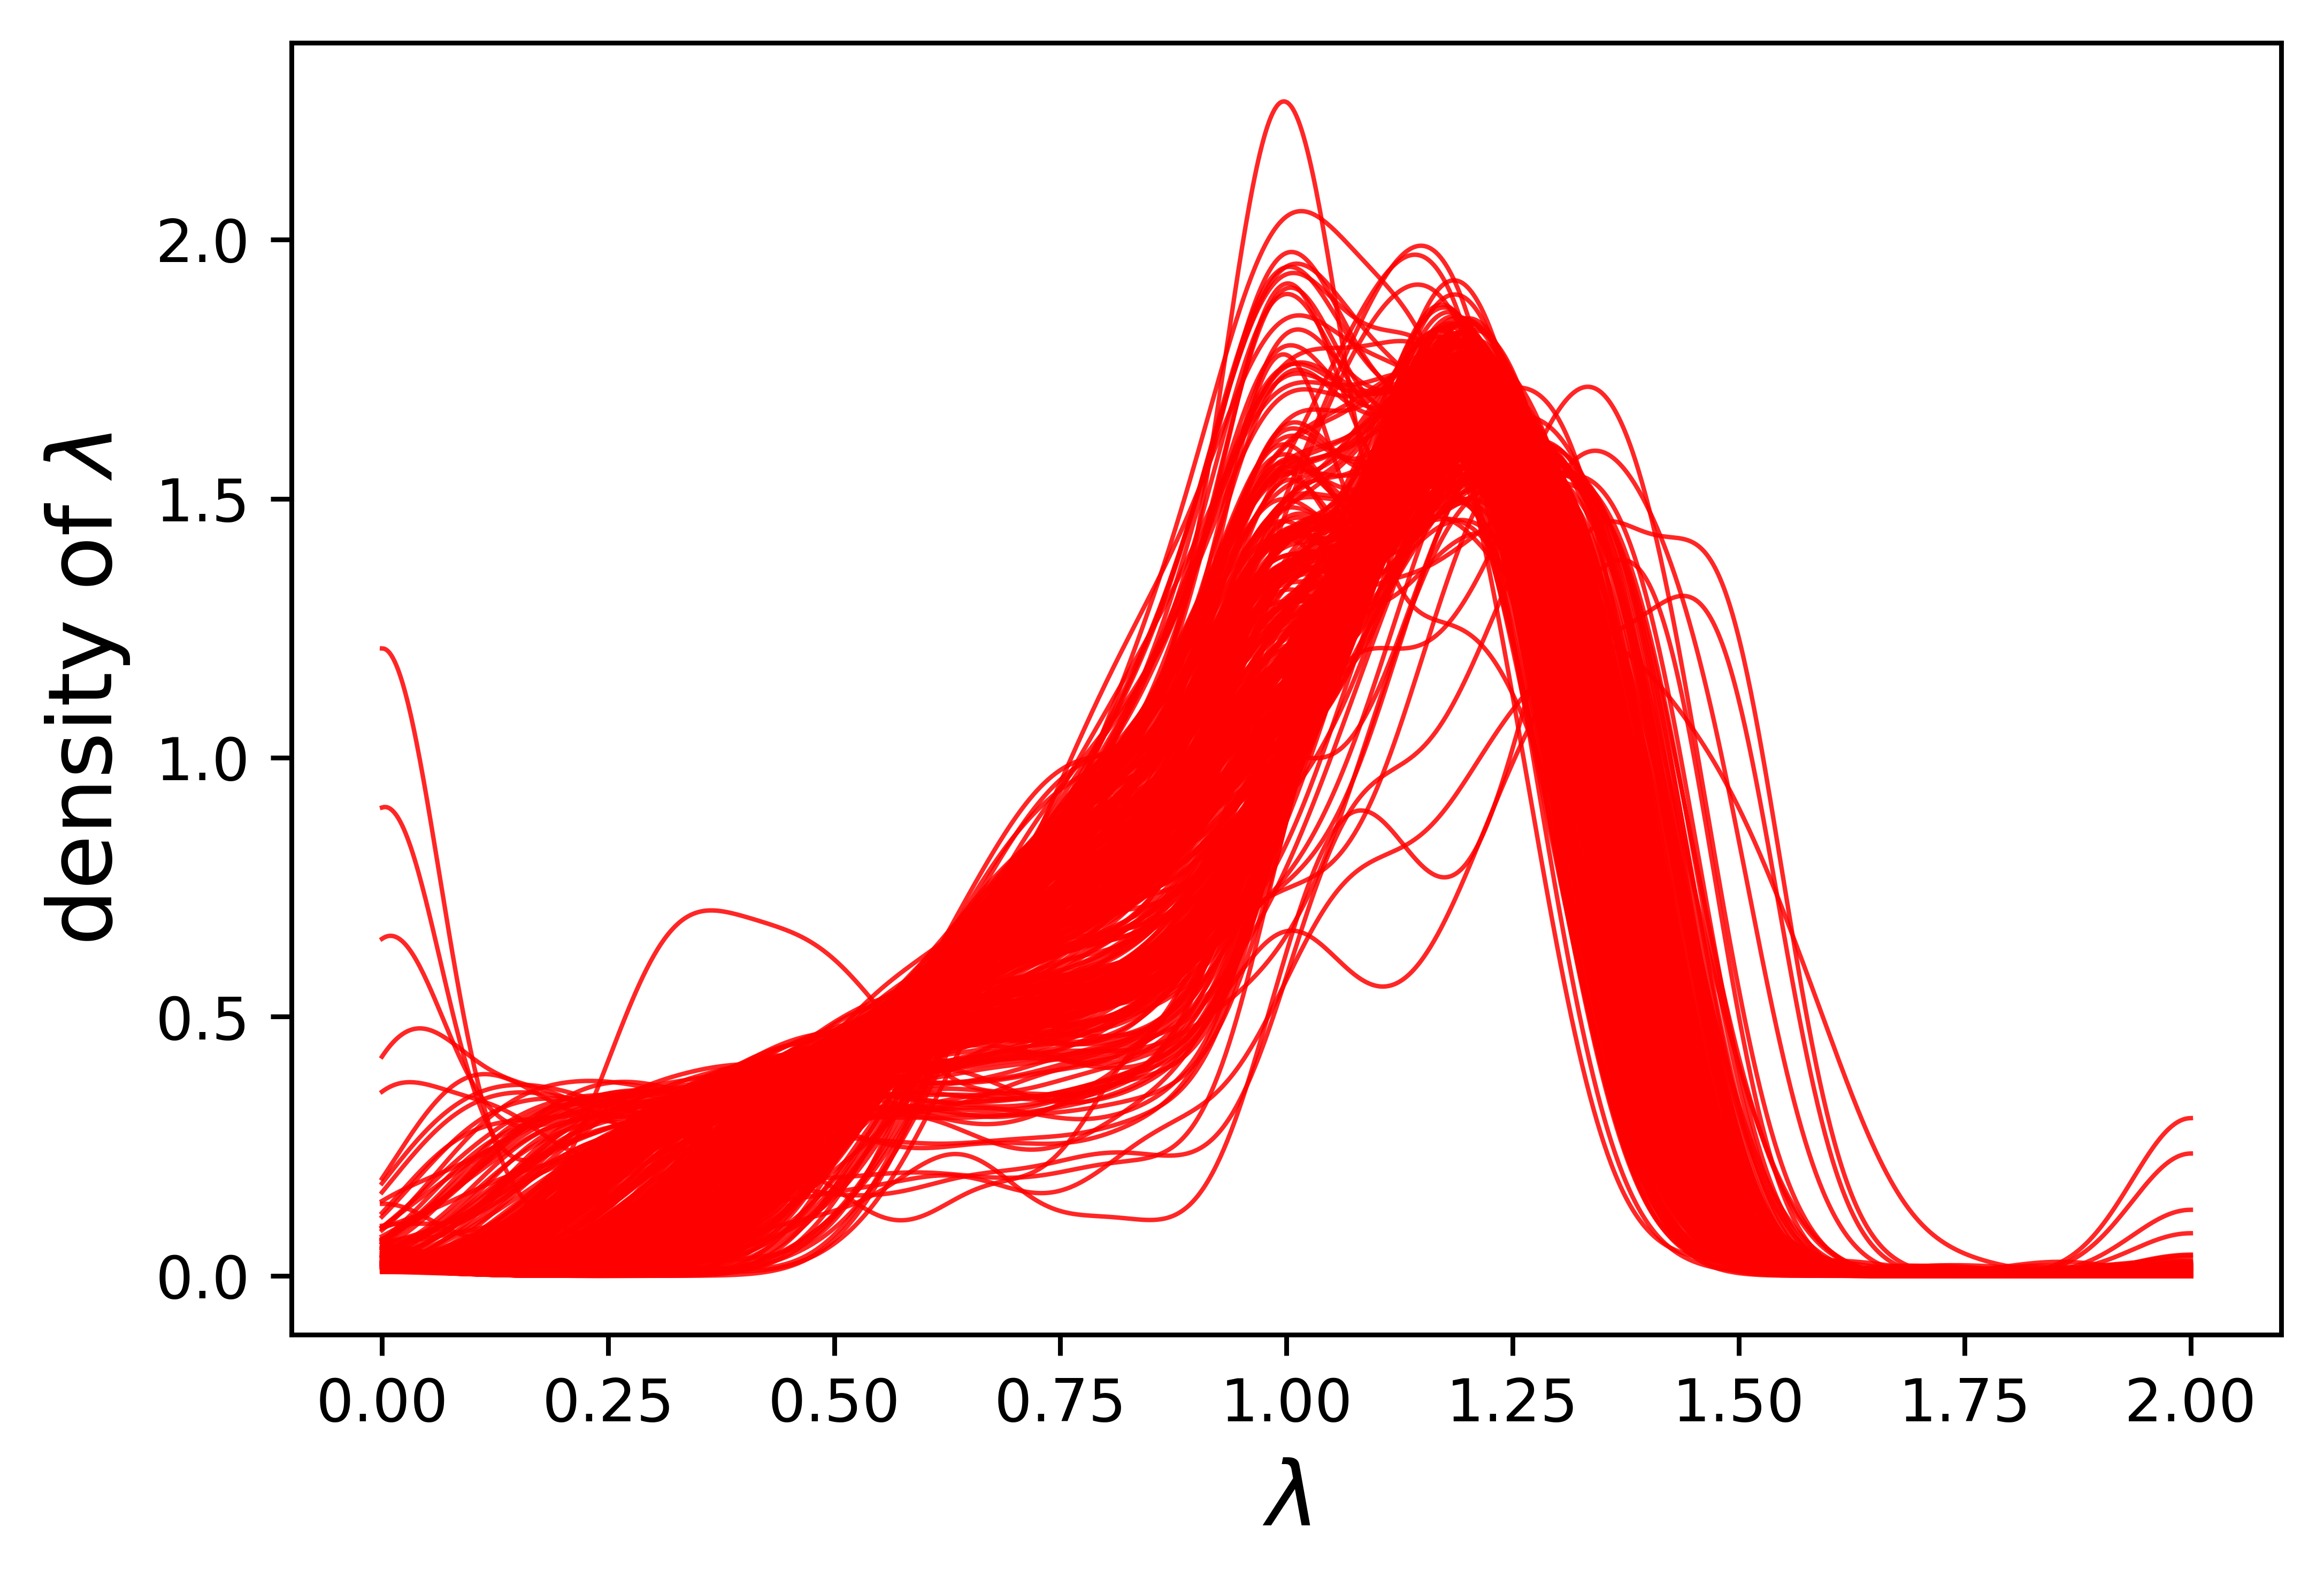

In [192]:
import statsmodels.api as sm

fig, ax = plt.subplots(dpi=800)

import matplotlib.colors
cmap = plt.cm.viridis

A = []

multiplicity_one = {}
spectrum_fam = {fam:[] for fam in v.keys()} 

L = {}

for language in spectrum_languages.keys():
    data = np.array(spectrum_languages[language])
    #plt.hist(data, bins='doane', cumulative=False, alpha=0.1,histtype='step',stacked=False,density=True,
    #    zorder=5, edgecolor='k')
    kde = sm.nonparametric.KDEUnivariate(data)
    kde.fit(bw=0.065) # Estimate the densities
    X=np.linspace(0, 2, num=1000)
    prediction=[kde.evaluate(x) for x in X]
    if language in entropy.keys() and language in family.keys():
        L[language]=prediction
        multiplicity_one[language] = nx.degree_pearson_correlation_coefficient(graphs[language],weight='weight')#kde.evaluate(1)
        spectrum_fam[family[language]]+=[prediction]
        
    ax.plot(X, prediction, '-', lw=0.75, color='r', alpha=0.85, zorder=10)
    
#plt.legend(loc='upper left',fontsize=12)
#plt.xlim([-10,10])
#plt.ylim([0., 3])
plt.xlabel(r'$\lambda$',fontsize=15)
plt.ylabel(r'density of $\lambda$',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('spectrum_all.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [193]:
for fam in spectrum_fam.keys():
    if len(spectrum_fam[fam])>1:
        Y=[np.mean(x) for x in list(zip(*spectrum_fam[fam]))]
        spectrum_fam[fam]=Y
    if len(spectrum_fam[fam])==1:
        spectrum_fam[fam]=spectrum_fam[fam][0]

In [197]:
spectrum_fam = {key:spectrum_fam[key] for key in spectrum_fam.keys() if len(spectrum_fam[key])>0}

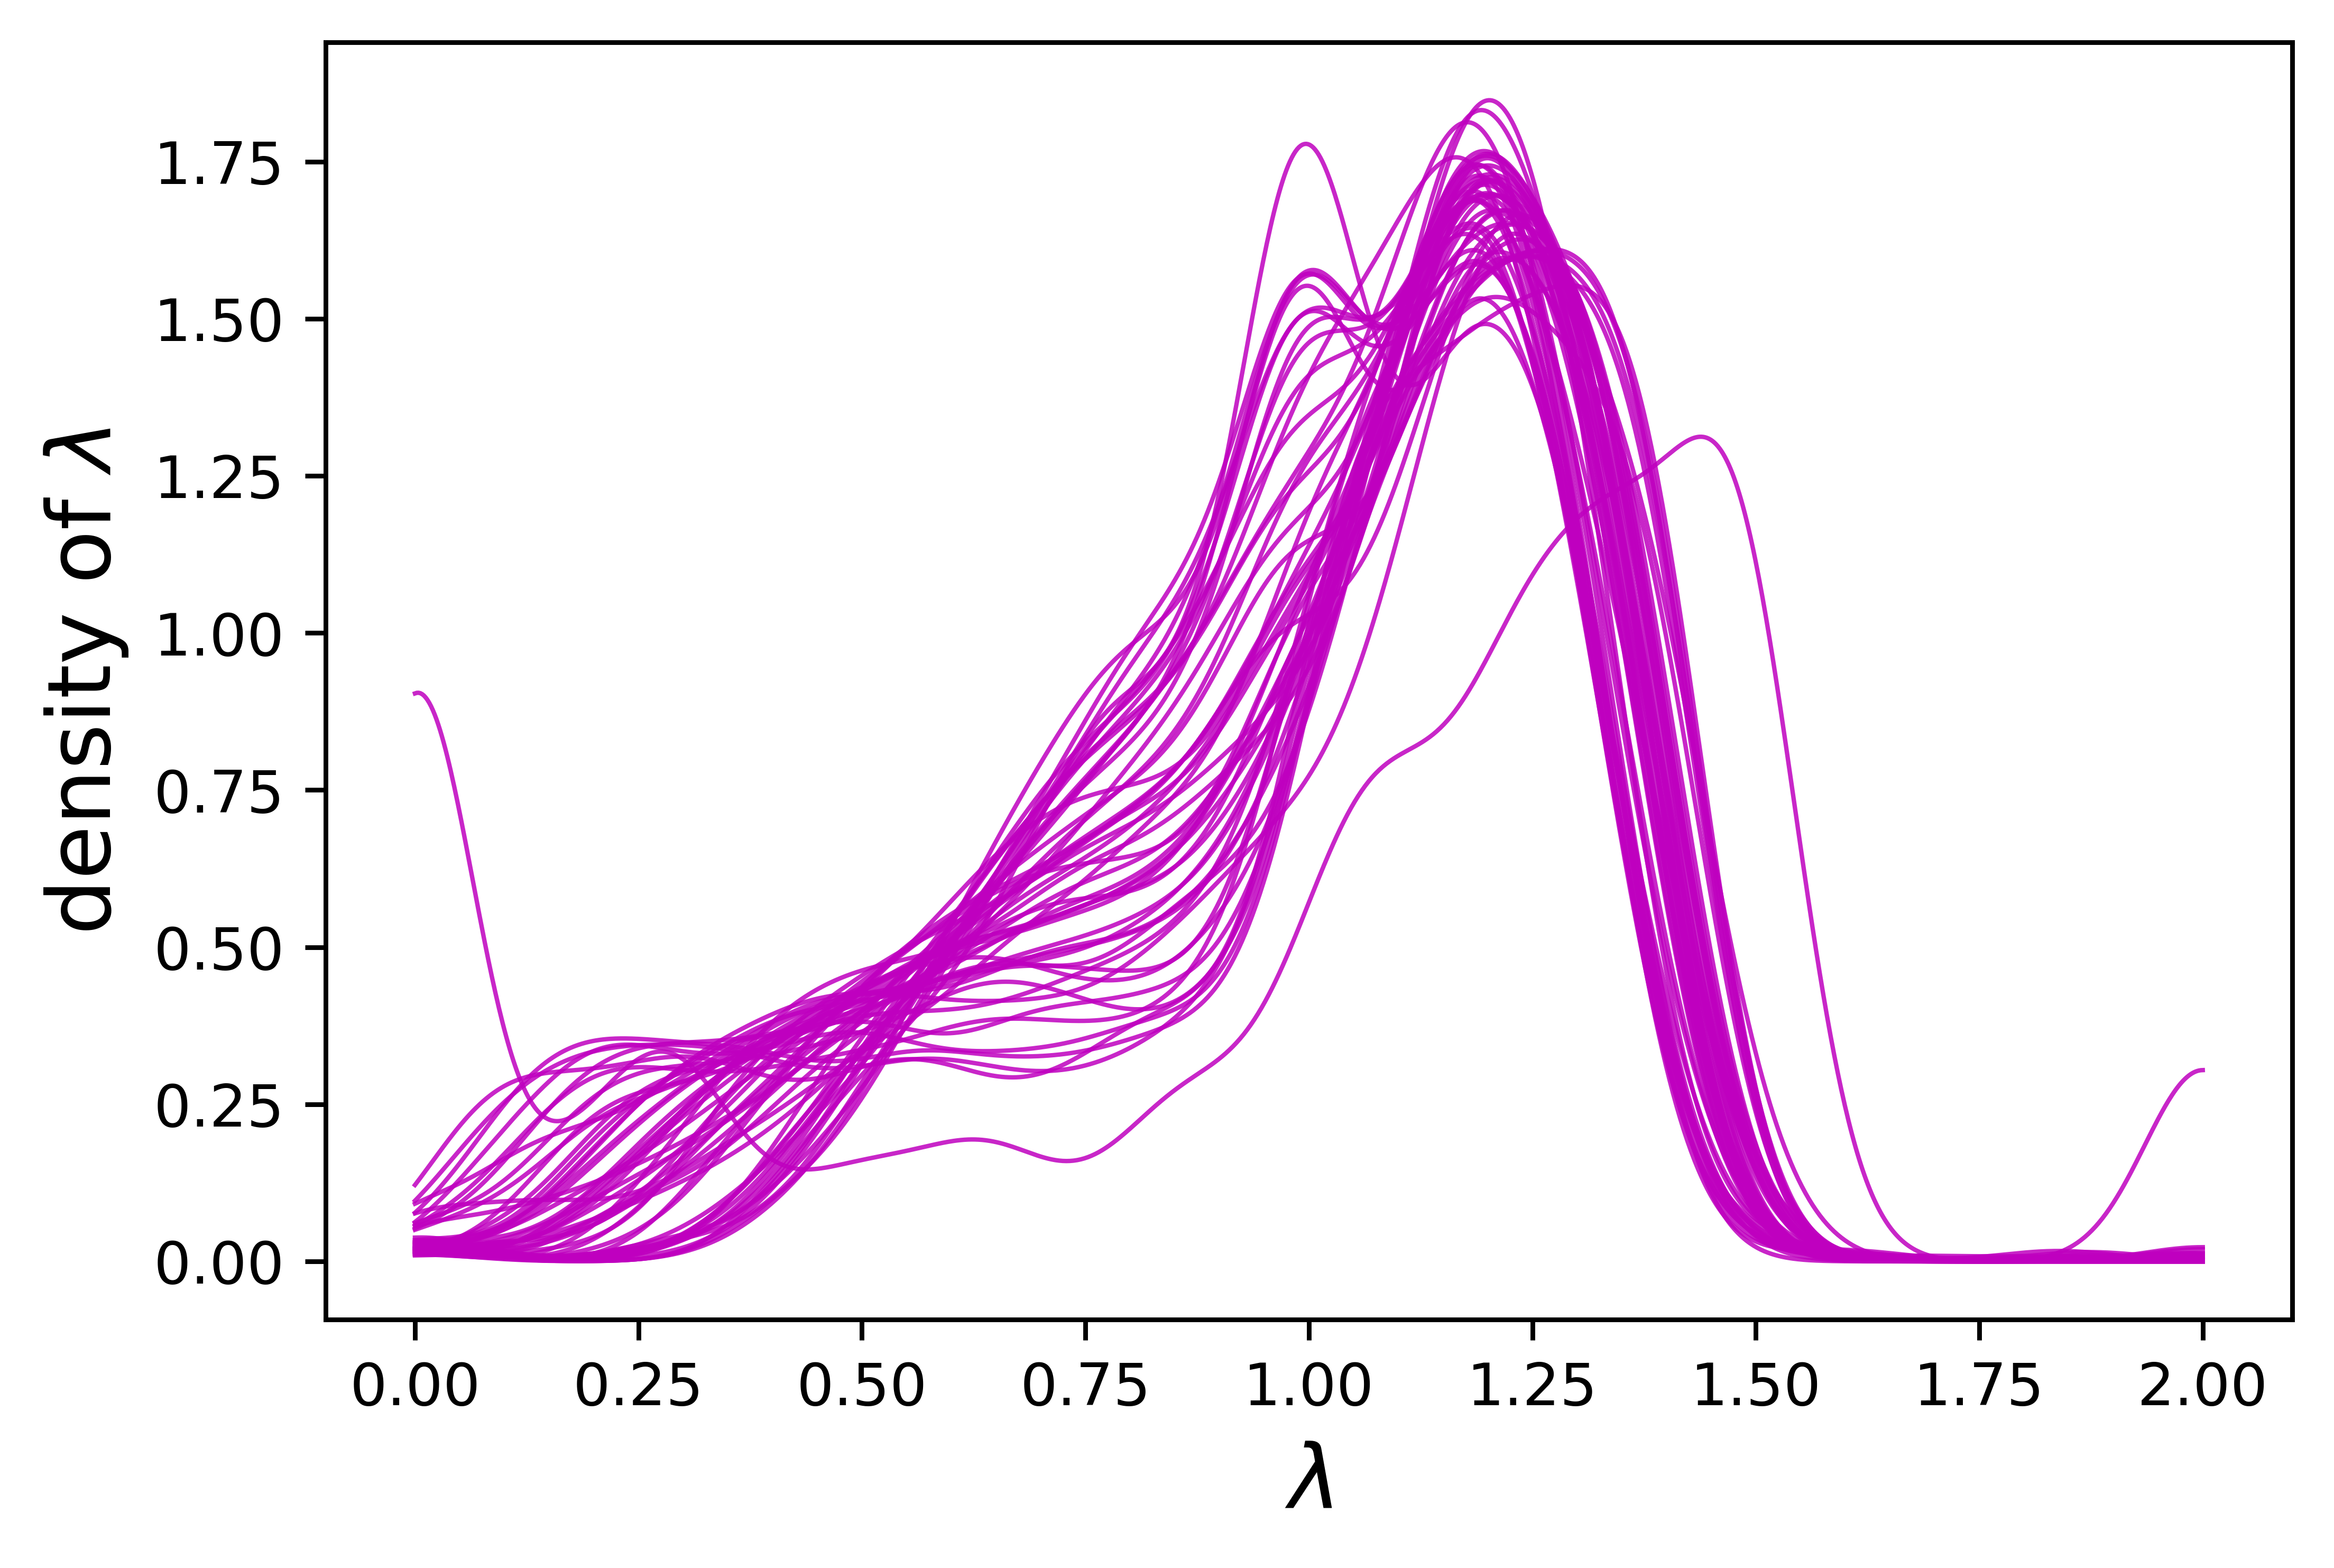

In [200]:
import statsmodels.api as sm

fig, ax = plt.subplots(dpi=800)

for fam in spectrum_fam.keys():
    
    X=np.linspace(0, 2, num=1000)
        
    ax.plot(X, spectrum_fam[fam], '-', lw=0.75, color='m', alpha=0.85, zorder=10)
    
plt.xlabel(r'$\lambda$',fontsize=15)
plt.ylabel(r'density of $\lambda$',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('spectrum_all_mean.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [143]:
## ¿qué pasa con la multiplicidad del valor propio 1 y las familias lingüísticas? :)

one_fam = {f:[] for f in v.keys()}

for fam in v.keys():
    for language in v[fam]:
        if language in multiplicity_one.keys():
            one_fam[fam]+=[multiplicity_one[language]]

In [144]:
one_fam

{'Abkhaz-Adyge': [-0.06998408165055359, -0.044959028091614506],
 'Austronesian': [-0.13406392944387877,
  -0.17951981496764838,
  -0.31977015713763923,
  -0.20028256909473455,
  -0.24703760889724577,
  -0.28212510186746925,
  -0.25921074408116207,
  -0.3104620541953277,
  -0.37826556248838983,
  -0.33488820897243377,
  -0.3662659194267637,
  -0.1719749862906304,
  -0.1788192332666857,
  -0.19053365665884012,
  -0.3113305526535233,
  -0.18438632220675977,
  -0.3329655885428018,
  -0.2673829222619567,
  -0.30730570100935906,
  -0.19973035076918727,
  -0.25298165367162273,
  -0.331752278886977,
  -0.34529724920805915,
  -0.1783288790436497,
  -0.3331082272059963,
  -0.26033441652747447,
  -0.3007705680256175,
  -0.3558524165360627,
  -0.32112749922998557,
  -0.21326684056741216],
 'Jivaroan': [-0.22455045296303566,
  -0.13171263751518308,
  -0.12772588755226938],
 'Atlantic-Congo': [-0.3656845521040464,
  -0.2681846581542562,
  -0.20626034721411907,
  -0.33456534424635975,
  -0.1085151127

Spearmans correlation: 0.713
0.5012449419959155


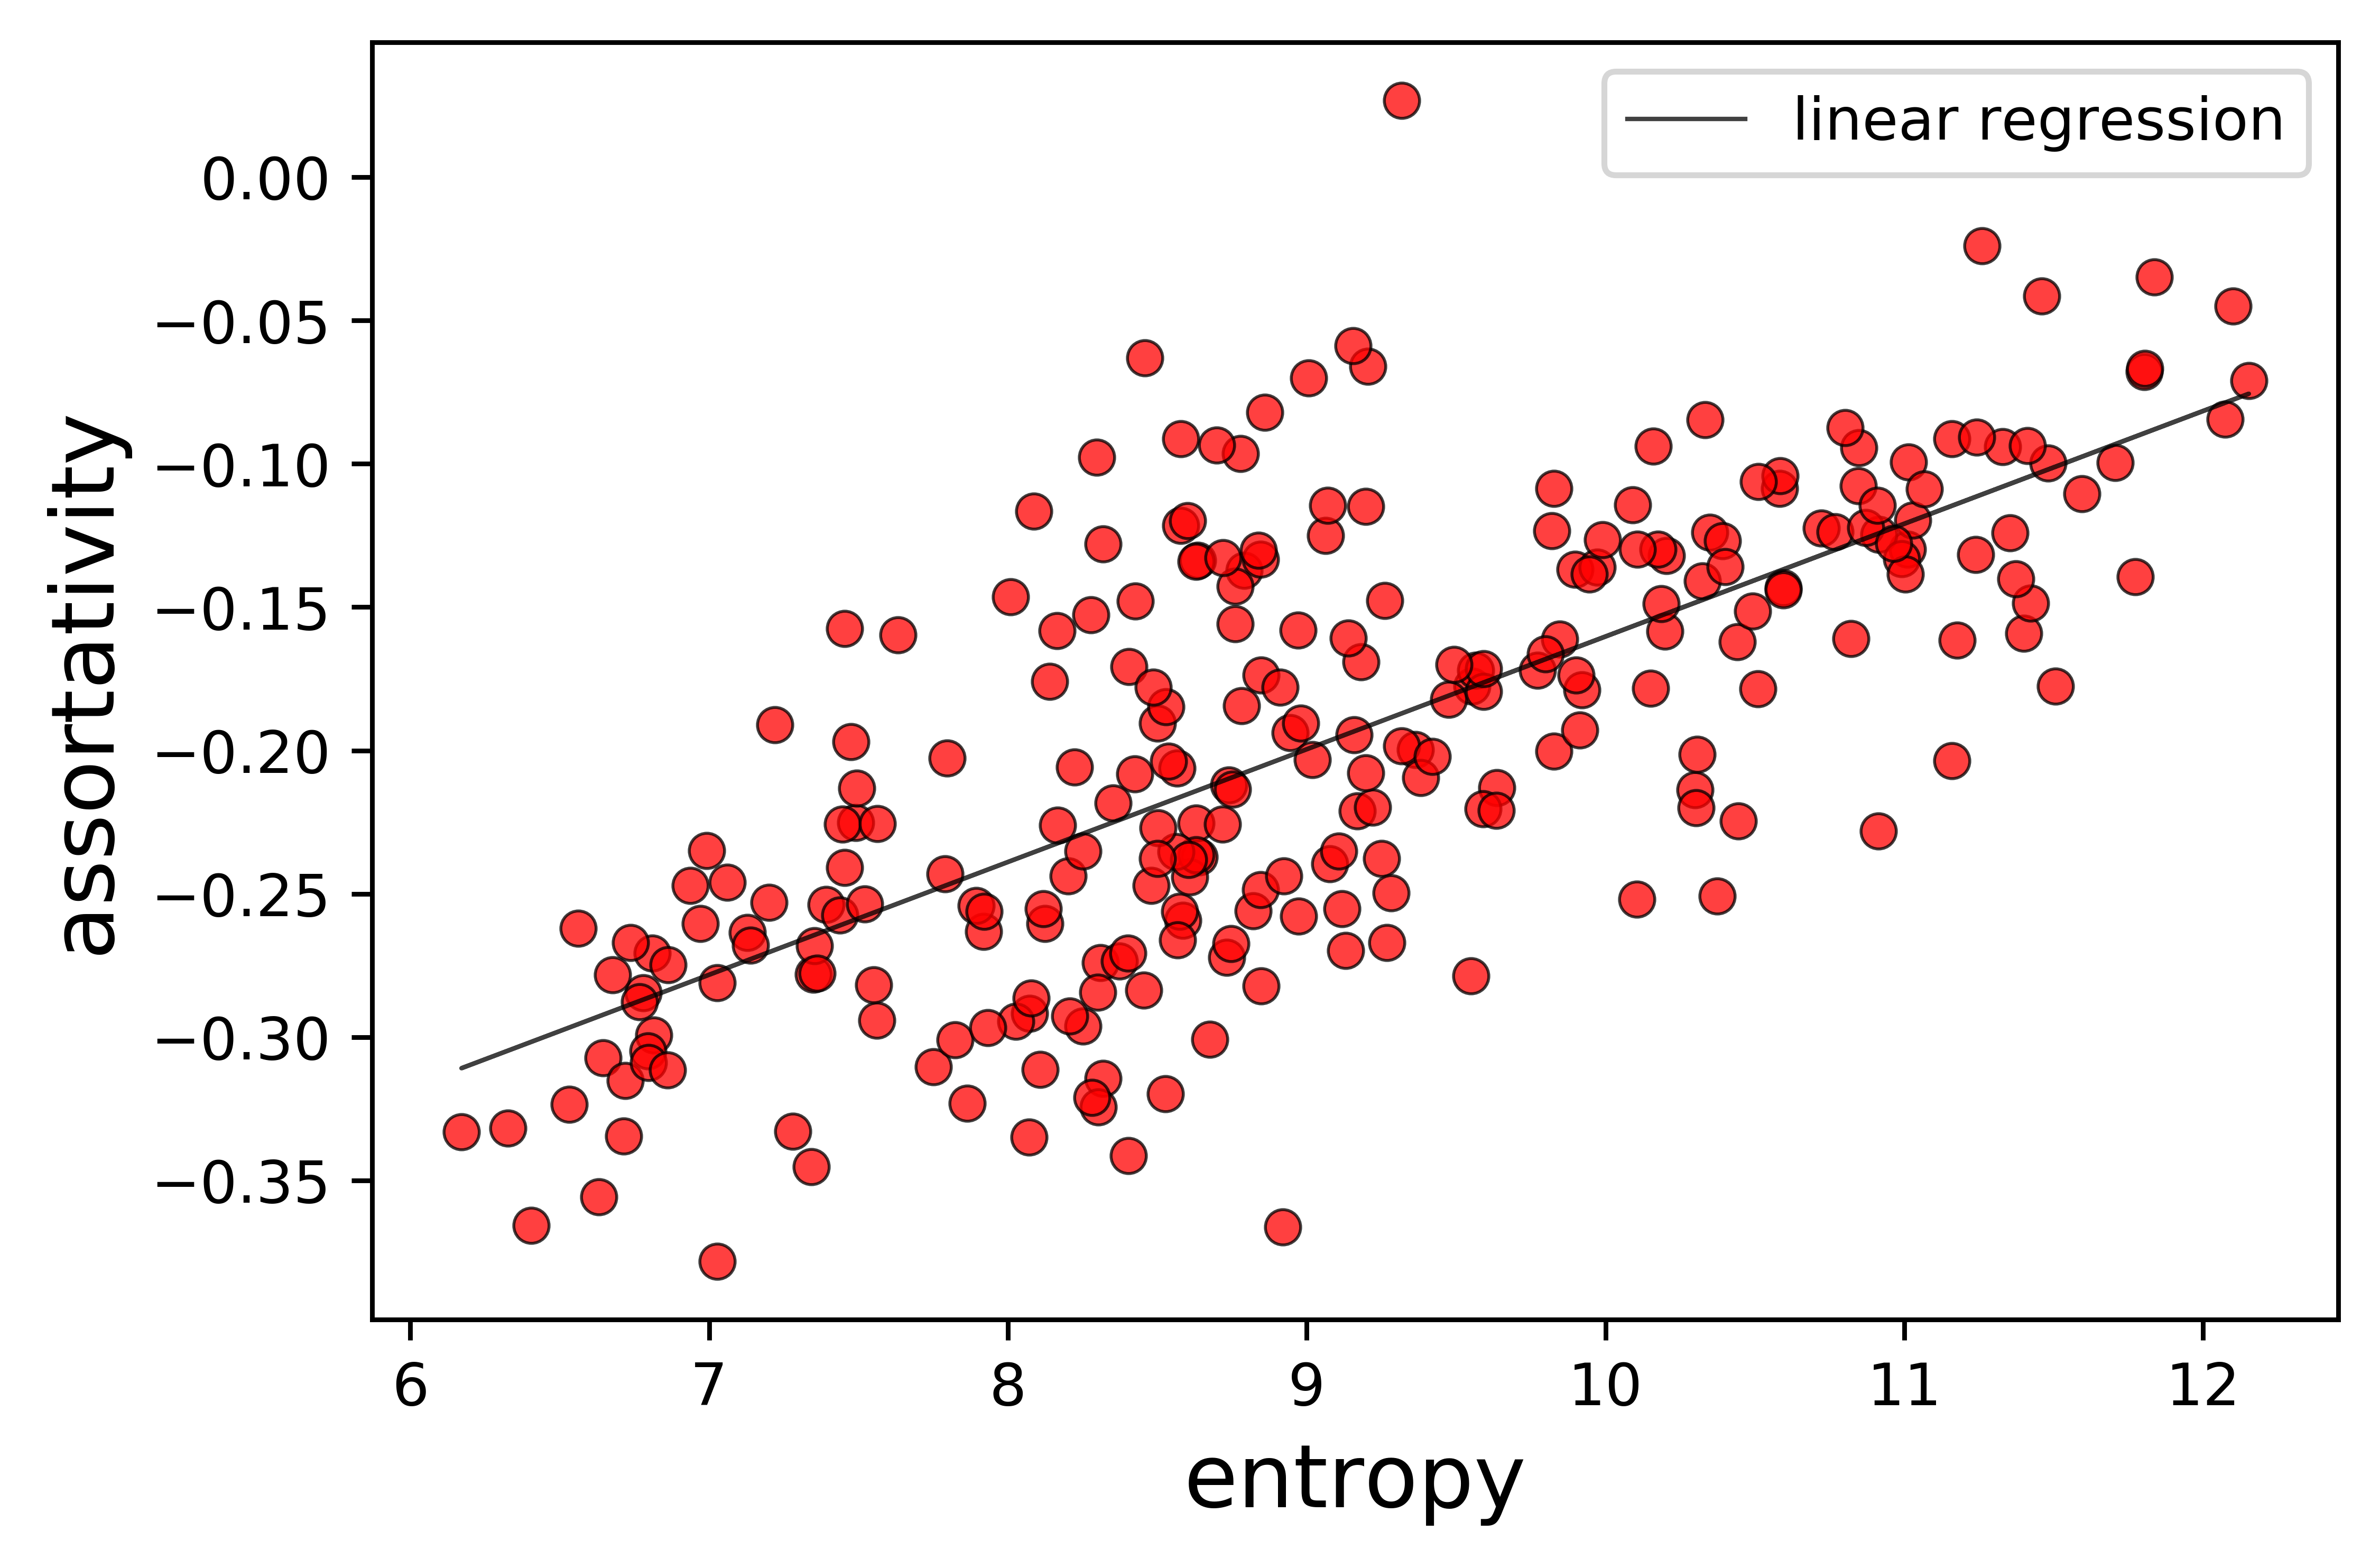

In [146]:
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(dpi=800)

X=[]
Y=[]

for key in entropy.keys():
    if key in multiplicity_one.keys():
        X+=[entropy[key]]
        Y+=[multiplicity_one[key]]

corr, _ = spearmanr(X,Y)
print('Spearmans correlation: %.3f' % corr)

x = np.array(X).reshape((-1, 1))
y = np.array(Y)

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(r_sq)
y_pred = model.predict(x)

ax.plot(X,Y,'o',color='r',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)
ax.plot(x,y_pred,color='k',linewidth=0.75,alpha=0.75,fillstyle='full',clip_on=True,label='linear regression')

plt.grid(False)
plt.legend(loc='best')
plt.ylabel(r'assortativity',fontsize=15)
plt.xlabel(r'entropy',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('entropy_one.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### Proyección en 2D
### Cada lengua es una lista de números (los valores propios). Como hemos ajustado una curva, las listas tienen el mismo tamaño (1000). La idea es entonces proyectar estos 1000 números en dos dimensiones con el fin de encontrar grupos de lenguas.

In [147]:
## en X guardamos todas las listas que están guardadas en el diccionario L

X=[]
for language in L.keys():
    X+=[[x[0] for x in L[language]]]

In [148]:
## usamos TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

from sklearn.manifold import TSNE

X = TSNE(n_components=2,perplexity=5,init='pca',n_iter=1000,random_state=0).fit_transform(X)

In [149]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

In [150]:
len(x)

257

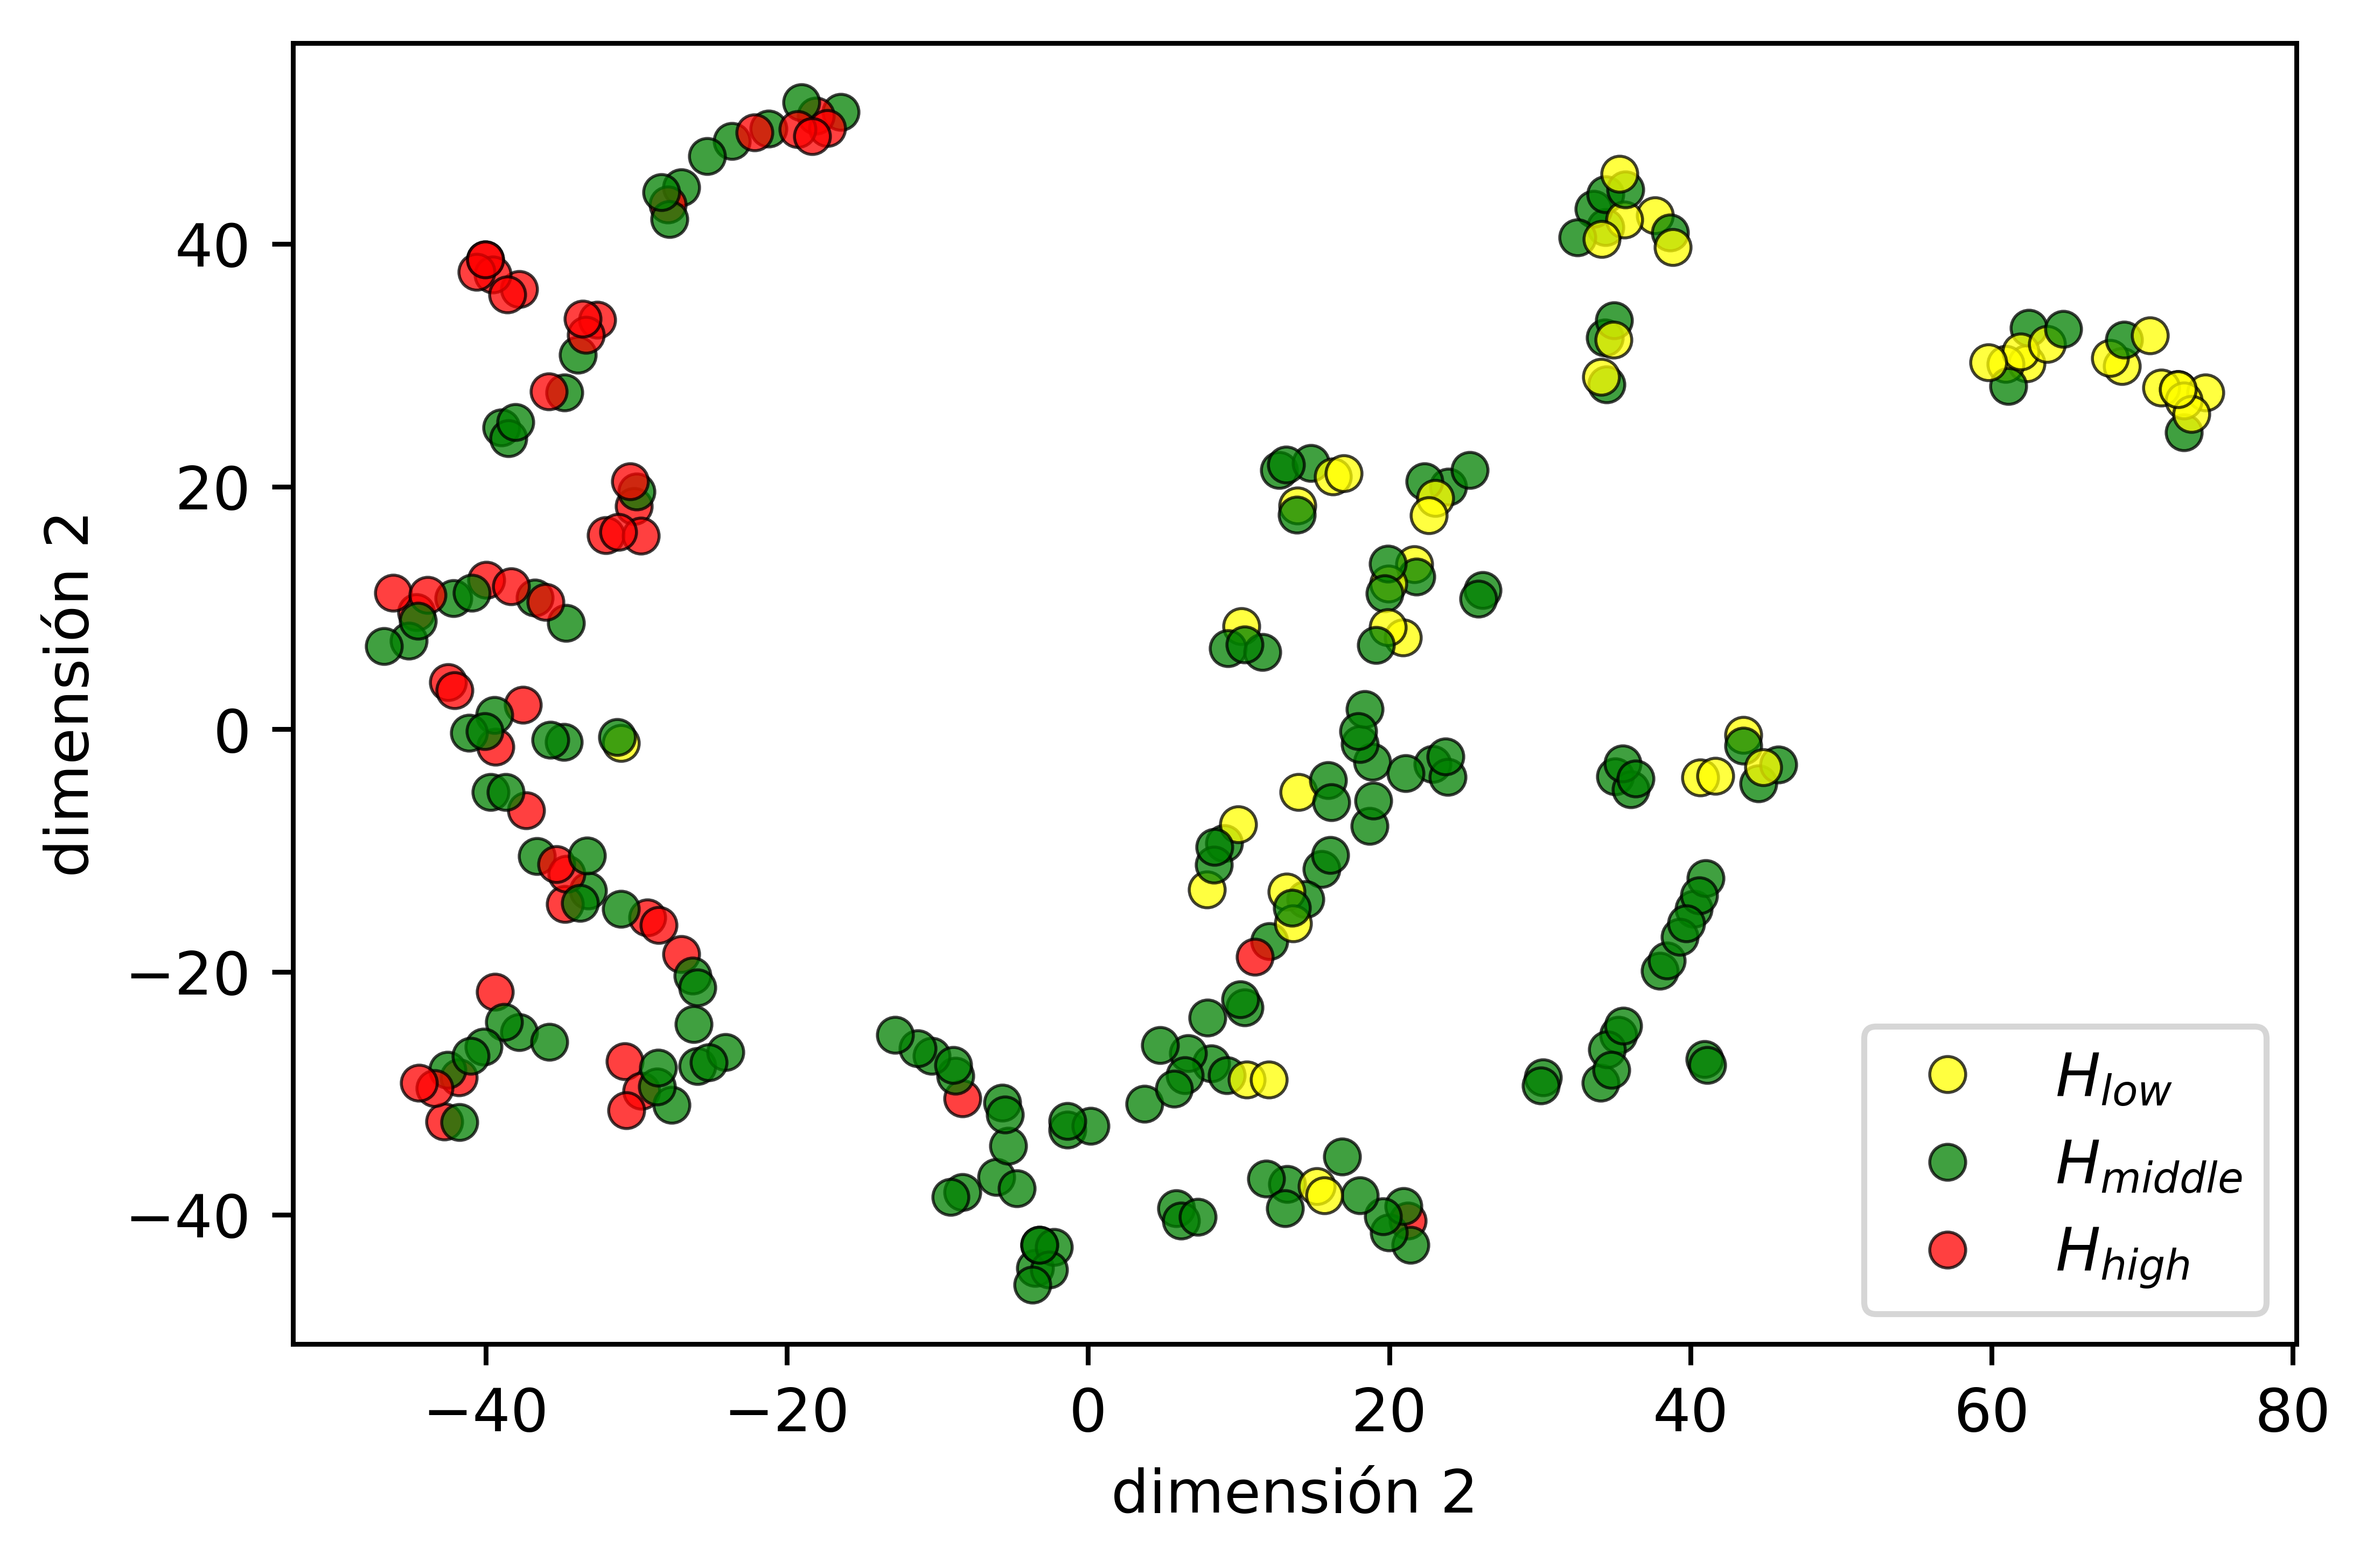

In [151]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

Em=np.mean(list(entropy.values()))
Estd=np.std(list(entropy.values()))

entropy_lim={}

for language in L.keys():
    if entropy[language]<Em-Estd:
        entropy_lim[language]='low'
    elif entropy[language]>Em-Estd and entropy[language]<Em+Estd:
        entropy_lim[language]='middle'
    else:
        entropy_lim[language]='high'
        
colors = {'low':'yellow','middle':'green','high':'r'}
markers = {'South America':'o', 'Australia':'X', 'Papunesia':'*', 'Africa':'D', 'Eurasia':'H', 'North America':'s'}

for language in L.keys():
    ax.plot(x[list(L.keys()).index(language)],y[list(L.keys()).index(language)],marker='o',color=colors[entropy_lim[language]],markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

ax.plot(x[list(L.keys()).index('ada')],y[list(L.keys()).index('ada')],marker='o',color=colors[entropy_lim['ada']],lw=0,markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label=r'$H_{low}$')
ax.plot(x[list(L.keys()).index('acu')],y[list(L.keys()).index('acu')],marker='o',color=colors[entropy_lim['acu']],lw=0,markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label=r'$H_{middle}$')
ax.plot(x[list(L.keys()).index('ady')],y[list(L.keys()).index('ady')],marker='o',color=colors[entropy_lim['ady']],lw=0,markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label=r'$H_{high}$')

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='South America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='South America']],'o',color='blue',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='South America')
#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],'X',color='r',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='North America')

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Maya+Otomangue')
#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] not in ['Quechuan','Panoan','Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] not in ['Quechuan','Panoan','Mayan','Otomanguean']]],'*',color='gray',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Otras')

plt.grid(False)
plt.legend(loc='best')
plt.ylabel(r'dimensión 2',fontsize=10)
plt.xlabel(r'dimensión 2',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('TSNE.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

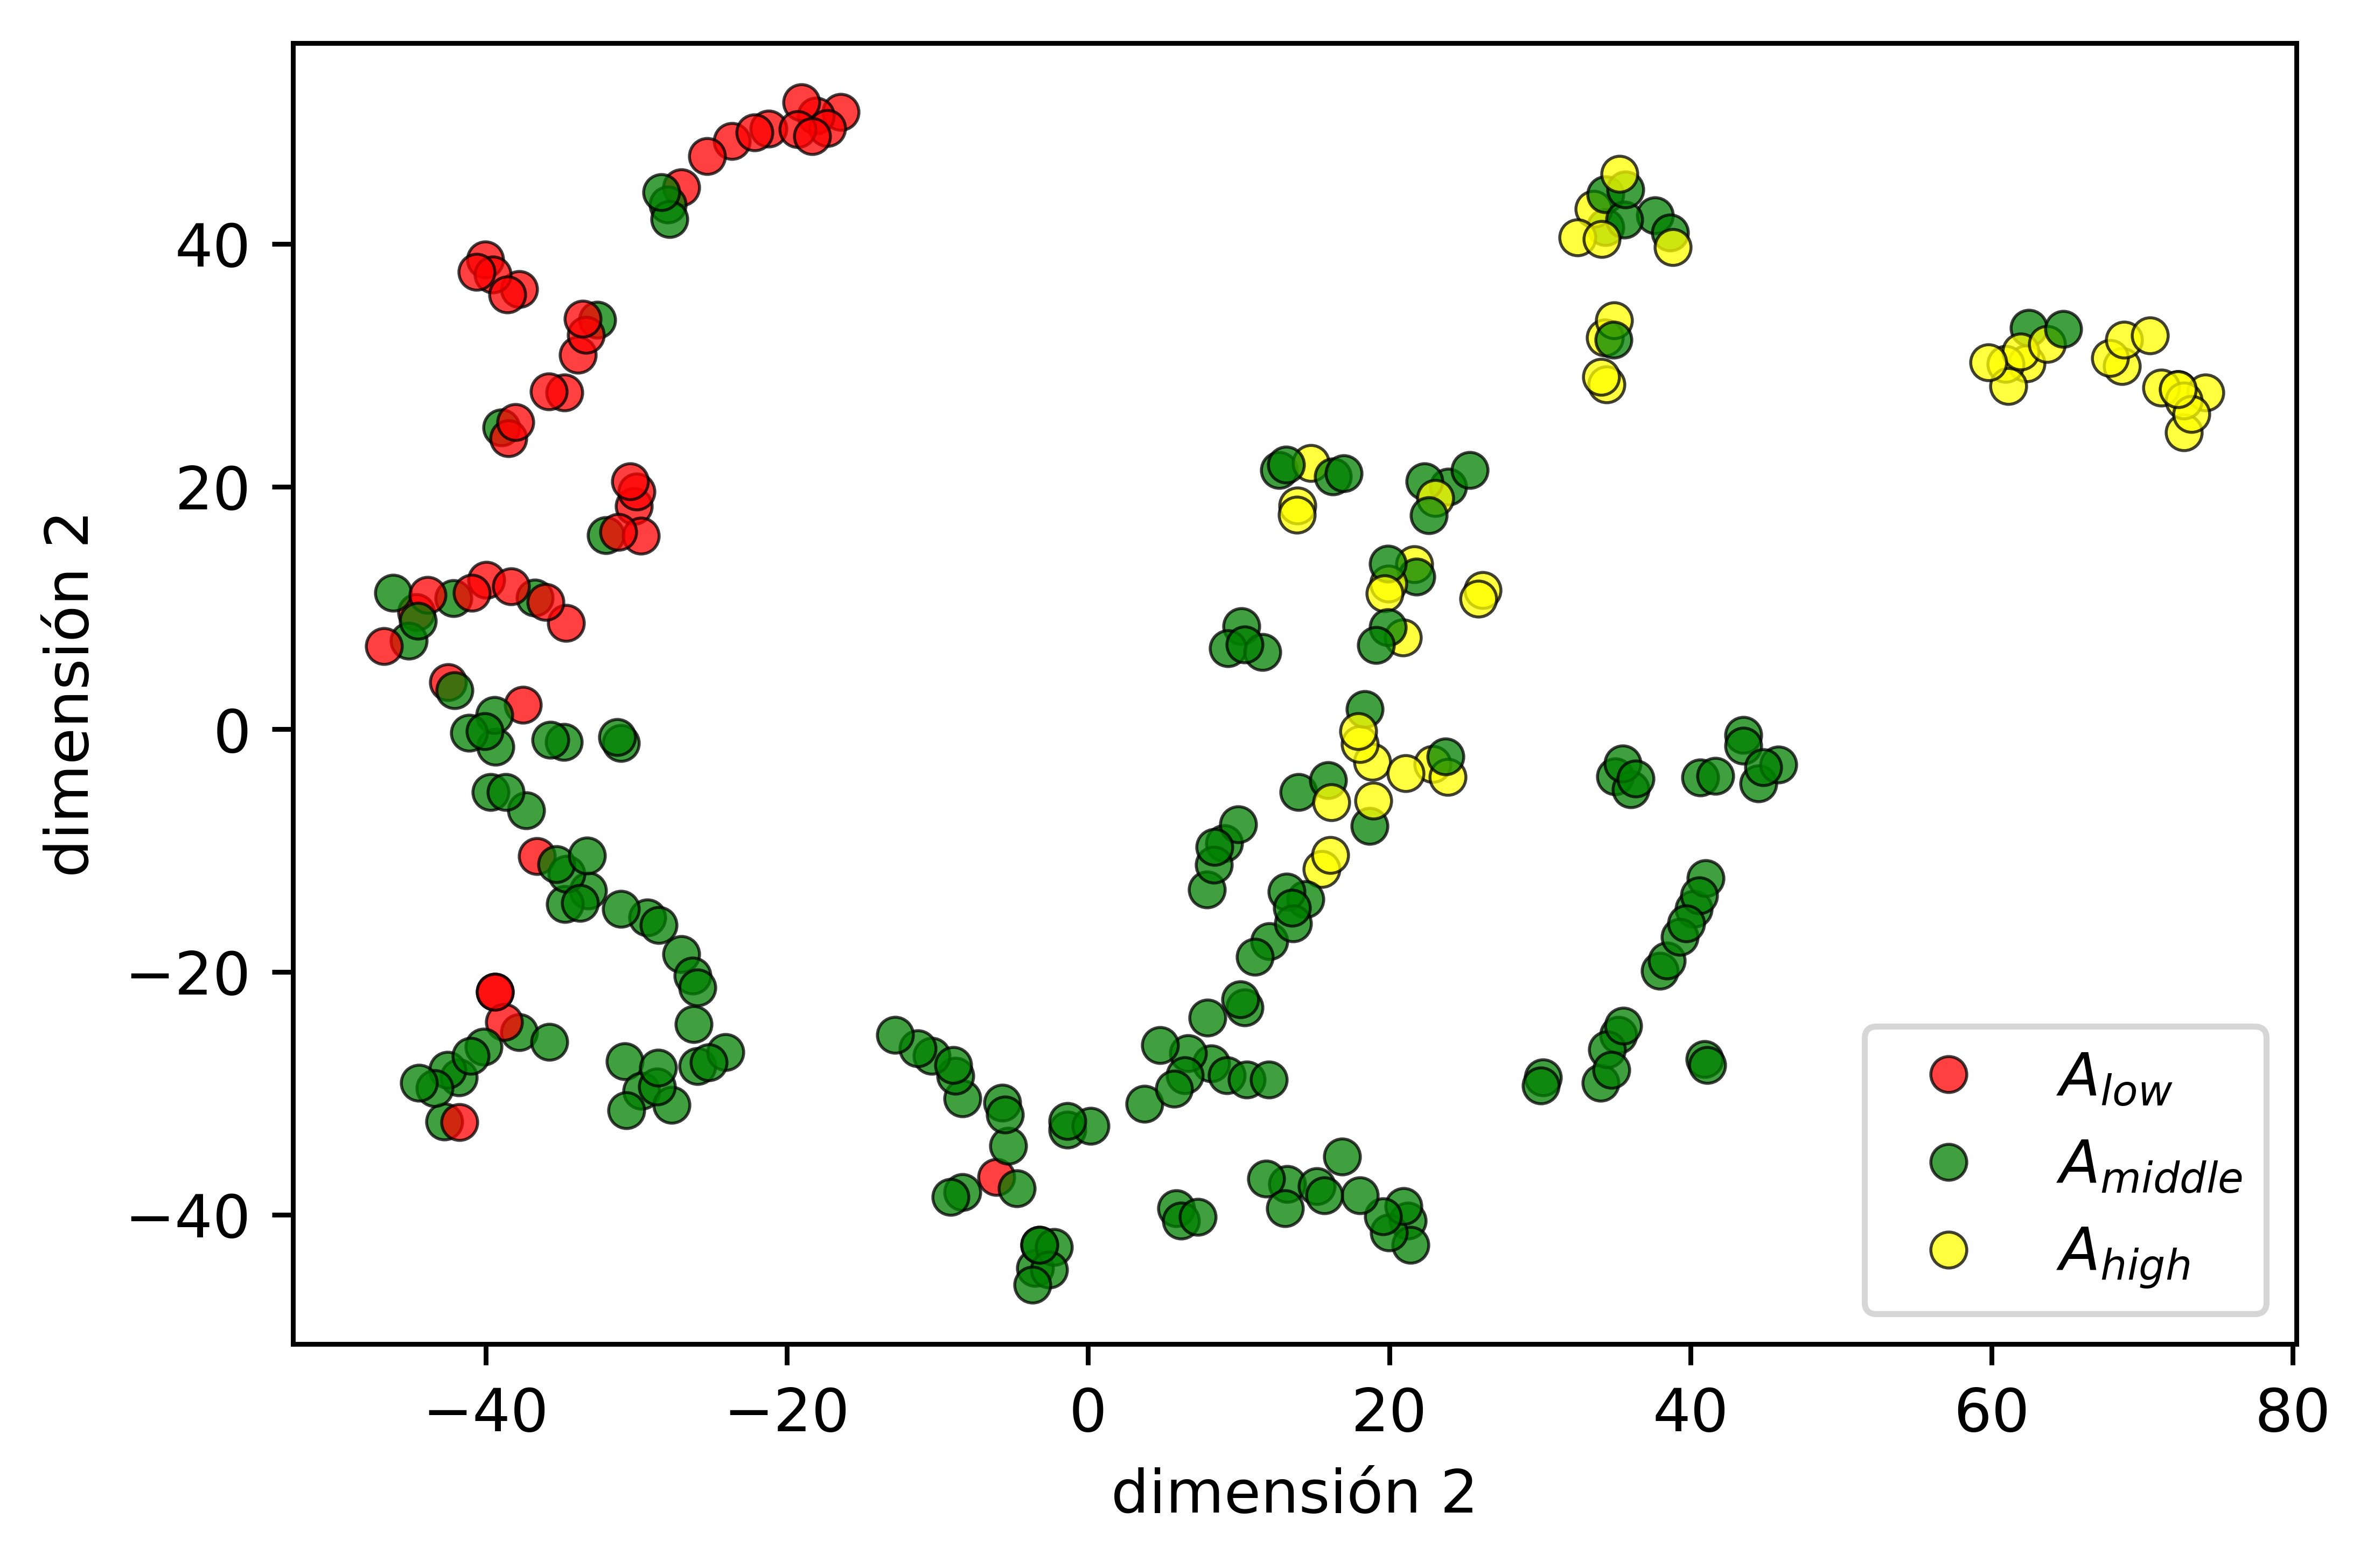

In [154]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

Em=np.mean(list(multiplicity_one.values()))
Estd=np.std(list(multiplicity_one.values()))

entropy_lim={}

for language in L.keys():
    if multiplicity_one[language]<Em-Estd:
        entropy_lim[language]='low'
    elif multiplicity_one[language]>Em-Estd and multiplicity_one[language]<Em+Estd:
        entropy_lim[language]='middle'
    else:
        entropy_lim[language]='high'
        
colors = {'low':'yellow','middle':'green','high':'r'}
markers = {'South America':'o', 'Australia':'X', 'Papunesia':'*', 'Africa':'D', 'Eurasia':'H', 'North America':'s'}

for language in L.keys():
    ax.plot(x[list(L.keys()).index(language)],y[list(L.keys()).index(language)],marker='o',color=colors[entropy_lim[language]],markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

ax.plot(x[list(L.keys()).index('aii')],y[list(L.keys()).index('aii')],marker='o',color=colors[entropy_lim['aii']],lw=0,markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label=r'$A_{low}$')
ax.plot(x[list(L.keys()).index('acu')],y[list(L.keys()).index('acu')],marker='o',color=colors[entropy_lim['acu']],lw=0,markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label=r'$A_{middle}$')
ax.plot(x[list(L.keys()).index('ada')],y[list(L.keys()).index('ada')],marker='o',color=colors[entropy_lim['ada']],lw=0,markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label=r'$A_{high}$')

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='South America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='South America']],'o',color='blue',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='South America')
#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],'X',color='r',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='North America')

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Maya+Otomangue')
#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] not in ['Quechuan','Panoan','Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] not in ['Quechuan','Panoan','Mayan','Otomanguean']]],'*',color='gray',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Otras')

plt.grid(False)
plt.legend(loc='best')
plt.ylabel(r'dimensión 2',fontsize=10)
plt.xlabel(r'dimensión 2',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('TSNE_one.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

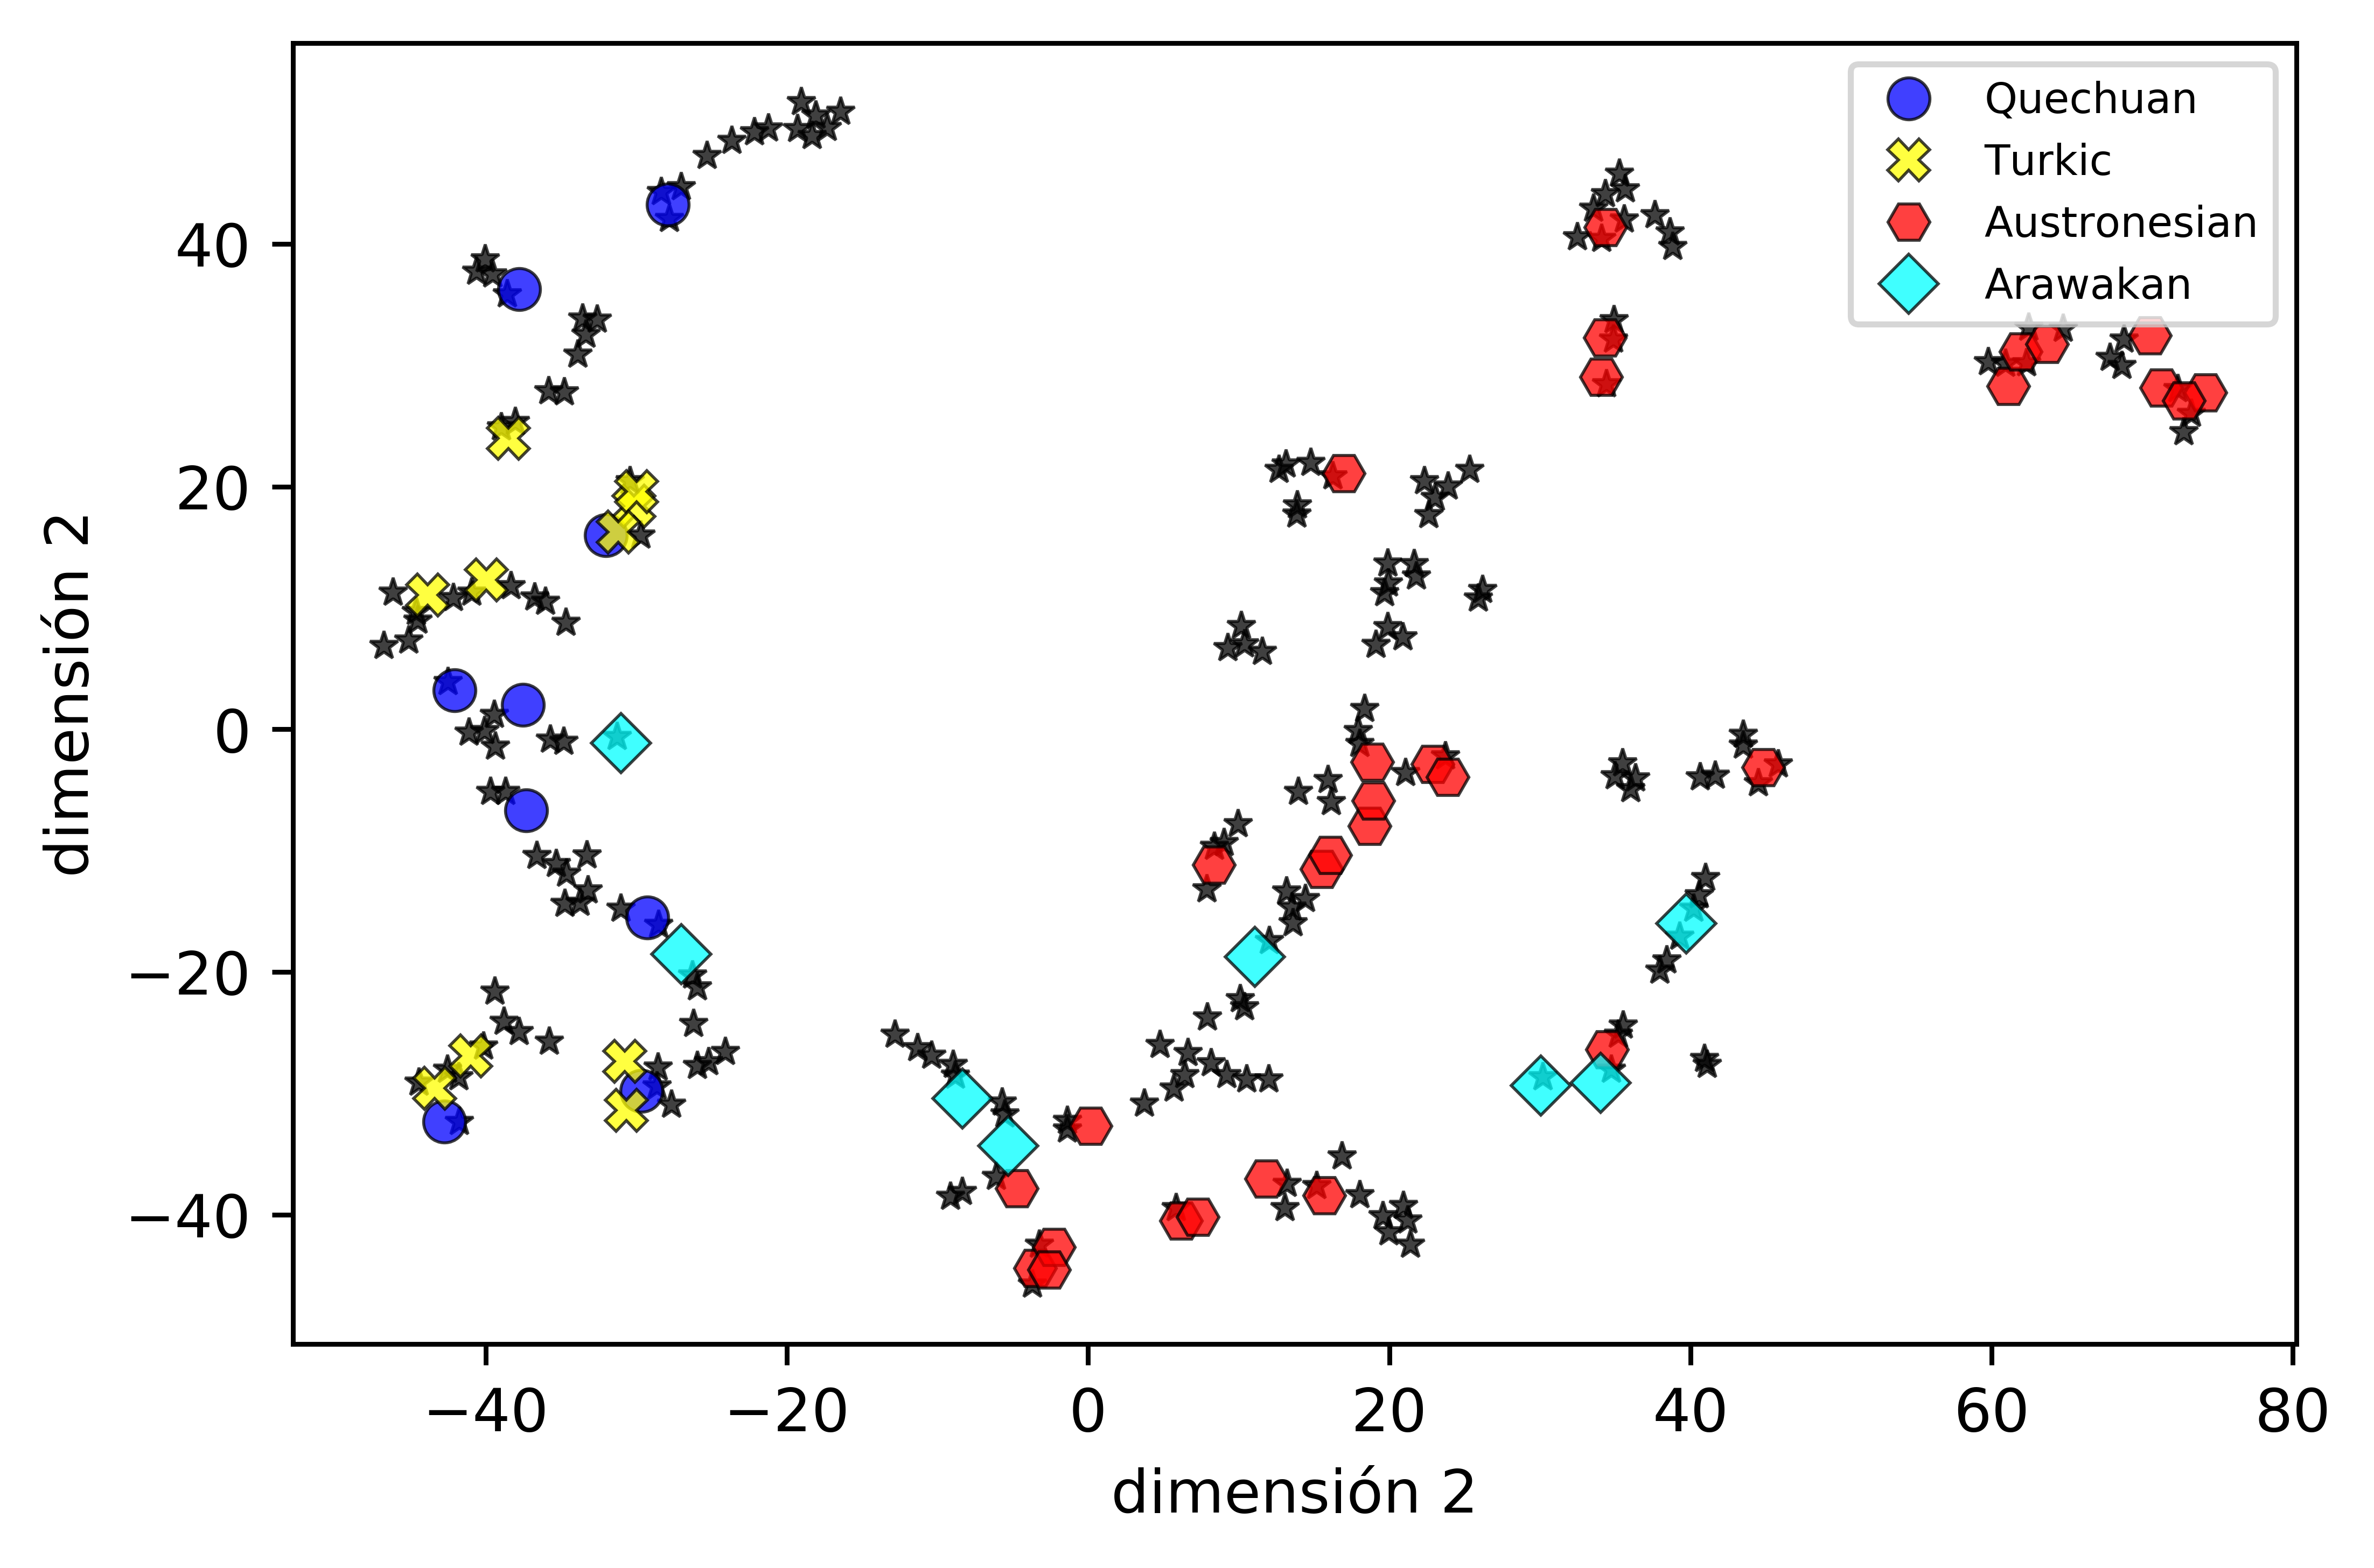

In [153]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

Em=np.mean(list(entropy.values()))
Estd=np.std(list(entropy.values()))

entropy_lim={}

for language in L.keys():
    if entropy[language]<Em-Estd:
        entropy_lim[language]='low'
    elif entropy[language]>Em-Estd and entropy[language]<Em+Estd:
        entropy_lim[language]='middle'
    else:
        entropy_lim[language]='high'
        
colors = {'low':'yellow','middle':'green','high':'r'}
markers = {'Quechuan':['o','b'], 'Turkic':['X','yellow'],'Austronesian':['H','r'],'Arawakan':['D','cyan']}

for language in L.keys():
    if family[language] not in markers.keys():
        ax.plot(x[list(L.keys()).index(language)],y[list(L.keys()).index(language)],marker='*',color='k',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

for fam in markers.keys():
    ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language]==fam]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language]==fam]],marker=markers[fam][0],color=markers[fam][1],lw=0,markersize=7,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label=fam)
#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],'X',color='r',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='North America')

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Maya+Otomangue')
#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] not in ['Quechuan','Panoan','Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] not in ['Quechuan','Panoan','Mayan','Otomanguean']]],'*',color='gray',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Otras')

plt.grid(False)
plt.legend(loc='best',fontsize=7)
plt.ylabel(r'dimensión 2',fontsize=10)
plt.xlabel(r'dimensión 2',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('TSNE_fam.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### Clasificador de familias lingüísticas

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
## usamos un clasificador famoso: random forest classifier :)

X=[]
Y=[]

for language in L.keys():
    
    i = list(L.keys()).index(language)
    
    if family[language] in ['Panoan','Quechuan']:
        
        Y+=[0]
        X+=[[x[0] for x in L[language]]]
        
    elif family[language] in ['Mayan','Otomanguean','Arawakan']:
        
        Y+=[1]
        X+=[[x[0] for x in L[language]]]

In [ ]:
model = RandomForestClassifier(n_estimators=1000,bootstrap=False,warm_start=True)
scores = cross_val_score(model, X, Y, cv=3, scoring='f1')
print((scores.mean(), scores.std() * 2))

In [ ]:
X=[]
Y=[]

for language in L.keys():
    
    i = list(L.keys()).index(language)
    
    if family[language] in ['Panoan','Quechuan','Arawakan']:
        
        Y+=[0]
        X+=[[x[0] for x in L[language]]]
        
    elif family[language] in ['Mayan','Otomanguean']:
        
        Y+=[1]
        X+=[[x[0] for x in L[language]]]

In [ ]:
model = RandomForestClassifier(n_estimators=1000,bootstrap=False,warm_start=True)
scores = cross_val_score(model, X, Y, cv=3, scoring='f1')
print((scores.mean(), scores.std() * 2))

## (4) Subfamilias según Glottolog

In [ ]:
## tomamos los dos primeros ítemes del árbol de familias

subfamily = {key:'_'.join([item[2:] for item in families_languages[key]][:2]) for key in families_languages.keys() if len(families_languages[key])>0}

In [ ]:
subfamily

In [ ]:
## miramos el diccionario anterior al revés 

v = defaultdict(list)

for key, value in sorted(subfamily.items()):
    v[value].append(key)

In [ ]:
v = dict(v)

In [ ]:
v

### sub Arawak vs macroareas

In [ ]:
fig, ax = plt.subplots(dpi=800)

import matplotlib.colors
cmap = plt.cm.viridis

AW = []
AN = []
AS = []
QP = []
MO = []
L = {}

for language in family.keys():
    data = np.array(spectrum_languages[language])
    #plt.hist(data, bins='doane', cumulative=False, alpha=0.1,histtype='step',stacked=False,density=True,
    #    zorder=5, edgecolor='k')
    kde = sm.nonparametric.KDEUnivariate(data)
    kde.fit(bw=0.065) # Estimate the densities
    X=np.linspace(0, 2, num=1000)
    prediction=[kde.evaluate(x) for x in X]
    #if family[language] in ['Quechuan','Panoan','Mayan','Otomanguean','Arawakan']:
    L[language]=prediction
        
    if family[language] in ['Quechuan','Panoan']:
        QP+=[prediction]
        ax.plot(X, prediction, markevery=20,marker='o',markersize=4,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=0.5, color='b', zorder=10)
    if family[language] in ['Mayan','Otomanguean']:
        MO+=[prediction]
        ax.plot(X, prediction, markevery=20, marker='X',markersize=4,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=0.5, color='m', zorder=10)
    if subfamily[language]=='Arawakan_Western_Maipuran':
        AW+=[prediction]
    if subfamily[language]=='Arawakan_Northern_Maipuran':
        AN+=[prediction]
    if subfamily[language]=='Arawakan_Southern_Maipuran':
        AS+=[prediction]
        
for prediction in AW:
    ax.plot(X, prediction, markevery=20,marker='H',markersize=5,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=1, color='orange', zorder=10)
for prediction in AN:
    ax.plot(X, prediction, markevery=20,marker='s',markersize=5,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=1, color='orange', zorder=10)
for prediction in AS:
    ax.plot(X, prediction, markevery=20,marker='*',markersize=5,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=1, color='orange', zorder=10)

ax.plot(X, QP[0],markevery=20,marker='o',markersize=4,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=0.5, color='b', zorder=10, label='Quechua+Pano')
ax.plot(X, MO[0],markevery=20,marker='X',markersize=4,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=0.5, color='m', zorder=10, label='Maya+Otomangue')
ax.plot(X, AW[0], markevery=20,marker='H',markersize=5,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=1, color='orange', zorder=10, label='Arawakan_Western_Maipuran')
ax.plot(X, AN[0], markevery=20,marker='s',markersize=5,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=1, color='orange', zorder=10, label='Arawakan_Northern_Maipuran')
ax.plot(X, AS[0], markevery=20,marker='*',markersize=5,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=1, color='orange', zorder=10, label='Arawakan_Southern_Maipuran')

plt.legend(loc='upper left',fontsize=7)
#plt.xlim([-10,10])
#plt.ylim([0., 3])
plt.xlabel(r'$\lambda$',fontsize=15)
plt.ylabel(r'$P(\lambda)$',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('spectrum_arawak_macro_sub.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### Proyección en 2D

In [ ]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Quechuan','Panoan']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Quechuan','Panoan']]],'o',color='blue',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Quechua+Pano')
ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Maya+Otomangue')
ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if subfamily[language] in ['Arawakan_Western_Maipuran']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if subfamily[language] in ['Arawakan_Western_Maipuran']]],'H',color='orange',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Arawakan_Western_Maipuran')
ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if subfamily[language] in ['Arawakan_Northern_Maipuran']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if subfamily[language] in ['Arawakan_Northern_Maipuran']]],'s',color='orange',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Arawakan_Northern_Maipuran')
ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if subfamily[language] in ['Arawakan_Southern_Maipuran']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if subfamily[language] in ['Arawakan_Southern_Maipuran']]],'*',color='orange',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Arawakan_Southern_Maipuran')
ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] not in ['Quechuan','Panoan','Mayan','Otomanguean','Arawakan']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] not in ['Quechuan','Panoan','Mayan','Otomanguean','Arawakan']]],'*',color='gray',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Otras')

plt.grid(False)
plt.legend(loc='best')
plt.ylabel(r't-SNE dimension 2',fontsize=15)
plt.xlabel(r't-SNE dimension 1',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('TSNE_macro_sub.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### Distancias entre lenguas

In [ ]:
L = {}

for language in family.keys():
    data = np.array(spectrum_languages[language])
    #plt.hist(data, bins='doane', cumulative=False, alpha=0.1,histtype='step',stacked=False,density=True,
    #    zorder=5, edgecolor='k')
    kde = sm.nonparametric.KDEUnivariate(data)
    kde.fit(bw=0.065) # Estimate the densities
    X=np.linspace(0, 2, num=1000)
    prediction=[kde.evaluate(x) for x in X]
    L[language]=prediction

In [ ]:
## la definición de distancia es bien simple: ordenamos los valores propios (de mayor a menor) 
## y sumamos las restas en valor absoluto
## solo miramos las familias más representadas :)

distances_dict = {key:{keykey:np.mean([np.abs(x-y) for x,y in zip(L[key],L[keykey])]) for keykey in L.keys()} for key in L.keys()}

In [ ]:
## usamos la matriz de distancias como la matriz de adyacencia de un nuevo grafo

def GRAPH(D,fam_dict):
    G=nx.Graph()
    for key in D.keys():
        for keykey in D[key].keys():
            if G.has_edge(key,keykey)==False:
                if (key in fam_dict.keys() and keykey in fam_dict.keys()):
                    if D[key][keykey]>0:
                        G.add_edge(key,keykey,weight=1-D[key][keykey])
    
    return G

In [ ]:
def plotG_family(D,fam_dict,pred=False):
    
    fig, ax = plt.subplots(dpi=800)
    
    G=GRAPH(D,fam_dict)
    
    edges = sorted(G.edges(data=True),key= lambda x: x[2]['weight'],reverse=False)
    
    #for edge in edges:
    #    GC=G.copy()
    #    GC.remove_edge(edge[0],edge[1])
    #    if nx.number_connected_components(GC)==1:
    #        G.remove_edge(edge[0],edge[1])
    #    else:
    #        break
            
    G=nx.maximum_spanning_tree(G,weight='weight')
       
    pos = nx.kamada_kawai_layout(G)
    
    nodes = [i for i in G.nodes() if i in fam_dict.keys()]#and fam_dict[i] in ['Arawakan','Quechuan','Panoan','Otomanguean','Mayan']]
    nodesA = [i for i in nodes if family[i]=='Arawakan']
    nodesQ = [i for i in nodes if family[i]=='Quechuan']
    nodesP = [i for i in nodes if family[i]=='Panoan']
    nodesO = [i for i in nodes if family[i]=='Otomanguean']
    nodesM = [i for i in nodes if family[i]=='Mayan']
    
    nodesnonA = [i for i in nodes if family[i] not in ['Quechuan','Panoan','Otomanguean','Mayan']]
    
    #nx.draw_networkx_nodes(G, pos, node_shape='+',node_size = 15, node_color='k',linewidths=1,alpha=0.85) 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesnonA, node_shape='+',node_size = 15, node_color='gray',linewidths=1,alpha=0.85,label='Otras') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesQ, node_shape='o',node_size = 40, node_color='blue',linewidths=1,alpha=0.85,label='Quechua+Pano') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesP, node_shape='o',node_size = 40, node_color='blue',linewidths=1,alpha=0.85)#,label='Pano') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesO, node_shape='X',node_size = 40, node_color='m',linewidths=1,alpha=0.85,label='Maya+Otomangue') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesM, node_shape='X',node_size = 40, node_color='m',linewidths=1,alpha=0.85)#,label='Maya') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesA, node_shape='H',node_size = 40, node_color='orange',linewidths=1,alpha=0.85,label='Arawak') 

    nx.draw_networkx_edges(G, pos, alpha=0.85,width=0.25,edge_color='k')
    plt.legend(loc='best',fontsize=10)
    ax.axis('off')
    if pred==False:
        plt.savefig('graph_fam.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1080)
    else:
        plt.savefig('graph_pred_fam.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1080)
    plt.show()

In [ ]:
## ahora miramos la red de familias

plotG_family(distances_dict,family)

In [ ]:
len(distances_dict.keys())

In [ ]:
## y la red de subfamilias ...

def plotG_subfamily(D,fam_dict,subfam_dict,pred=False):
    
    fig, ax = plt.subplots(dpi=800)
    
    G=GRAPH(D,fam_dict)
    
    edges = sorted(G.edges(data=True),key= lambda x: x[2]['weight'],reverse=False)
    
    #for edge in edges:
    #    GC=G.copy()
    #    GC.remove_edge(edge[0],edge[1])
    #    if nx.number_connected_components(GC)==1:
    #        G.remove_edge(edge[0],edge[1])
    #    else:
    #        break
            
    G=nx.maximum_spanning_tree(G,weight='weight')
       
    pos = nx.kamada_kawai_layout(G)
    
    nodes = [i for i in G.nodes() if i in fam_dict.keys() and fam_dict[i] in ['Arawakan','Quechuan','Panoan','Otomanguean','Mayan']]
    nodesAW = [i for i in nodes if subfamily[i]=='Arawakan_Western_Maipuran']
    nodesAN = [i for i in nodes if subfamily[i]=='Arawakan_Northern_Maipuran']
    nodesAS = [i for i in nodes if subfamily[i]=='Arawakan_Southern_Maipuran']
    nodesQ = [i for i in nodes if family[i]=='Quechuan']
    nodesP = [i for i in nodes if family[i]=='Panoan']
    nodesO = [i for i in nodes if family[i]=='Otomanguean']
    nodesM = [i for i in nodes if family[i]=='Mayan']
    
    
    #############
    #ax.plot(X, AW[0], markevery=20,marker='H',markersize=5,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=1, color='orange', zorder=10, label='Arawakan_Western_Maipuran')
    #ax.plot(X, AN[0], markevery=20,marker='s',markersize=5,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=1, color='orange', zorder=10, label='Arawakan_Northern_Maipuran')
    #ax.plot(X, AS[0], markevery=20,marker='*',markersize=5,markeredgecolor='k',markeredgewidth=0.25,fillstyle='full', lw=0.5, alpha=1, color='orange', zorder=10, label='Arawakan_Southern_Maipuran')

    #############
    
    nodesnonA = [i for i in nodes if family[i] not in ['Arawakan','Quechuan','Panoan','Otomanguean','Mayan']]
    
    #nx.draw_networkx_nodes(G, pos, node_shape='+',node_size = 15, node_color='k',linewidths=1,alpha=0.85) 
    #nx.draw_networkx_nodes(G, pos,nodelist=nodesnonA, node_shape='+',node_size = 15, node_color='gray',linewidths=1,alpha=0.85,label='Other') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesQ, node_shape='o',node_size = 40, node_color='blue',linewidths=1,alpha=0.85,label='Quechua') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesP, node_shape='*',node_size = 40, node_color='r',linewidths=1,alpha=0.85,label='Pano') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesO, node_shape='X',node_size = 40, node_color='m',linewidths=1,alpha=0.85,label='Otomangue') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesM, node_shape='D',node_size = 40, node_color='green',linewidths=1,alpha=0.85,label='Maya') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesAW, node_shape='H',node_size = 40, node_color='orange',linewidths=1,alpha=0.85,label='Arawakan_Western_Maipuran') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesAN, node_shape='s',node_size = 40, node_color='orange',linewidths=1,alpha=0.85,label='Arawakan_Northern_Maipuran') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesAS, node_shape='*',node_size = 40, node_color='orange',linewidths=1,alpha=0.85,label='Arawakan_Southern_Maipuran') 

    nx.draw_networkx_edges(G, pos, alpha=0.85,width=0.25,edge_color='k')
    plt.legend(loc='best',fontsize=7)
    ax.axis('off')
    if pred==False:
        plt.savefig('graph_subfam.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1080)
    else:
        plt.savefig('graph_pred_subfam.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1080)
    plt.show()

In [ ]:
plotG_subfamily(distances_dict,family,subfamily)

### Representación de lenguas usando 
http://littell.nfshost.com/papers/littell2017uriel.pdf :)
http://littell.nfshost.com/papers/malaviya2017typology.pdf

In [ ]:
!pip install lang2vec

In [ ]:
## extraemos vectores 

import lang2vec.lang2vec as l2v

features_pred = {}

for language in L.keys():
    if language in l2v.LEARNED_LANGUAGES:
        # usamos los vectores entrenamos según http://littell.nfshost.com/papers/malaviya2017typology.pdf
        features = l2v.get_features(language, l2v.fs_concatenation(['syntax_knn']))[language]
        features_pred[language]=features

In [ ]:
## calculamos distancia coseno entre estas representaciones
from scipy import spatial

features_pred = {key:{keykey:spatial.distance.cosine(features_pred[key],features_pred[keykey]) for keykey in features_pred.keys()} for key in features_pred.keys()}

In [ ]:
## miramos la red de familias

plotG_family(features_pred,family,True)

In [ ]:
## ahora miramos la red de subfamilias

plotG_subfamily(features_pred,family,subfamily,True)

## (5) Grafos con todas las lenguas
### En un pequeño experimento, usamos todas las lenguas del diccionario "spectrum_languages" para construir grafos

In [ ]:
## todas las lenguas en las Américas

features_pred_all = {}

#for language in spectrum_languages.keys():
    #if language in l2v.LANGUAGES:
        # usamos los vectores entrenamos según http://littell.nfshost.com/papers/malaviya2017typology.pdf
    #features = l2v.get_features(language, l2v.fs_concatenation(['syntax_knn']))[language]
#    features_pred_all[language]=spectrum_languages[language]
    
for language in family.keys():
    if language in spectrum_languages.keys():
        data = np.array(spectrum_languages[language])
        #plt.hist(data, bins='doane', cumulative=False, alpha=0.1,histtype='step',stacked=False,density=True,
        #    zorder=5, edgecolor='k')
        kde = sm.nonparametric.KDEUnivariate(data)
        kde.fit(bw=0.065) # Estimate the densities
        X=np.linspace(0, 2, num=1000)
        prediction=[kde.evaluate(x) for x in X]
        features_pred_all[language]=prediction

In [ ]:
## distancias de coseno

features_pred_all = {key:{keykey:np.mean([np.abs(x-y) for x,y in zip(features_pred_all[key],features_pred_all[keykey])]) for keykey in features_pred_all.keys()} for key in features_pred_all.keys()}
#features_pred_all = {key:{keykey:spatial.distance.cosine(features_pred_all[key],features_pred_all[keykey]) for keykey in features_pred_all.keys()} for key in features_pred_all.keys()}

In [ ]:
## extraemos las familias para todas las lenguas de features_pred_all

#families=l2v.get_features('arn', "fam",header=True)['CODE']

#families_languages={language:[] for language in features_pred_all.keys()}

#for language in features_pred_all.keys():
#    fam = l2v.get_features(language, "fam")
#    if 1 in fam[language]:
#        indexes = np.where(np.array(fam[language]) == 1)[0]
#        for ii in indexes:
#            families_languages[language]+=[families[ii]]

In [ ]:
#pickle.dump(families_languages,open('families_languages_all.p','wb'))

In [ ]:
families_languages = pickle.load(open('families_languages_all.p','rb'))

In [ ]:
## familias!

family = {key:families_languages[key][0][2:] for key in families_languages.keys() if len(families_languages[key])>0}

In [ ]:
## diccionario al revés

## miramos el diccionario anterior al revés 

v = defaultdict(list)

for key, value in sorted(family.items()):
    v[value].append(key)

In [ ]:
v=dict(v)

In [ ]:
v

In [ ]:
## subfamilias!

subfamily = {key:'_'.join([item[2:] for item in families_languages[key]][:2]) for key in families_languages.keys() if len(families_languages[key])>0}

In [ ]:
## diccionario al revés

## miramos el diccionario anterior al revés 

v = defaultdict(list)

for key, value in sorted(subfamily.items()):
    v[value].append(key)

In [ ]:
v=dict(v)

In [ ]:
v

In [ ]:
## nueva versión para graficar los grafos :)

def plotG_all(D,f,fam_dict):
    
    fig, ax = plt.subplots(dpi=800)
    
    G=GRAPH(D,fam_dict)
    
    G.remove_nodes_from([i for i in G.nodes() if i in fam_dict.keys() and family[i] not in ['Arawakan','Quechuan','Panoan','Otomanguean','Mayan','Jivaroan','Barbacoan','Algic']]
)
    
    edges = sorted(G.edges(data=True),key= lambda x: x[2]['weight'],reverse=False)
    
    #for edge in edges:
    #    GC=G.copy()
    #    GC.remove_edge(edge[0],edge[1])
    #    if nx.number_connected_components(GC)==1:
    #        G.remove_edge(edge[0],edge[1])
    #    else:
    #        break
            
    G=nx.maximum_spanning_tree(G,weight='weight')
       
    pos = nx.kamada_kawai_layout(G)
    #if f == 'family':
    #labels={i:family[i] for i in G.nodes() if i in family.keys()}# and family[i] not in ['Arawakan','Quechuan','Panoan','Otomanguean','Mayan','Nuclear-Macro-Je','Athapaskan-Eyak-Tlingit','Uto-Aztecan','Tucanoan','Chibchan','Tupian','Mixe-Zoque','Totonacan']}#and family[i] in ['Panoan','Arawakan','Mayan','Otomanguean','Quechuan']}
    #    nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=2.5,font_color='k',font_family='monospace')
    #if f == 'subfamily':
    #labels={i:subfamily[i] for i in G.nodes() if i in subfamily.keys() and family[i]=='Arawakan'}
    #nx.draw_networkx_labels(G,pos,labels,alpha=0.75,font_size=4,font_color='k',font_family='monospace')
    #colors = {x:y for x,y in zip(['Panoan','Arawakan','Mayan','Otomanguean','Quechuan'],['m','orange','r','yellow','cyan'])}
    #colors = {i:colors[families[i]] for i in G.nodes()}
    
    nodes = [i for i in G.nodes() if i in fam_dict.keys() and family[i] in ['Arawakan','Quechuan','Panoan','Otomanguean','Mayan','Jivaroan','Barbacoan','Algic']]
    
    nodesA = [i for i in nodes if family[i]=='Arawakan']
    nodesQ = [i for i in nodes if family[i]=='Quechuan']
    nodesP = [i for i in nodes if family[i]=='Panoan']
    nodesO = [i for i in nodes if family[i]=='Otomanguean']
    nodesM = [i for i in nodes if family[i]=='Mayan']
    nodesJ = [i for i in nodes if family[i]=='Jivaroan']
    nodesB = [i for i in nodes if family[i]=='Barbacoan']
    nodesAl = [i for i in nodes if family[i]=='Algic']
    #nodesT = [i for i in nodes if family[i]=='Tucanoan']
    
    nodesnonA = [i for i in nodes if family[i] not in ['Arawakan','Quechuan','Panoan','Otomanguean','Mayan','Jivaroan','Barbacoan','Algic']]
    
    #nx.draw_networkx_nodes(G, pos, node_shape='+',node_size = 15, node_color='k',linewidths=1,alpha=0.85) 
    #nx.draw_networkx_nodes(G, pos,nodelist=nodesnonA, node_shape='+',node_size = 15, node_color='gray',linewidths=1,alpha=0.85,label='Other') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesQ, node_shape='o',node_size = 20, node_color='blue',linewidths=1,alpha=0.85,label='Quechua') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesP, node_shape='*',node_size = 20, node_color='r',linewidths=1,alpha=0.85,label='Pano') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesO, node_shape='X',node_size = 20, node_color='m',linewidths=1,alpha=0.85,label='Otomangue') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesM, node_shape='D',node_size = 20, node_color='green',linewidths=1,alpha=0.85,label='Maya') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesJ, node_shape='s',node_size = 20, node_color='salmon',linewidths=1,alpha=0.85,label='Jivaro') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesB, node_shape='8',node_size = 20, node_color='cyan',linewidths=1,alpha=0.85,label='Barbacoa') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesAl, node_shape='^',node_size = 20, node_color='k',linewidths=1,alpha=0.85,label='Algic') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesA, node_shape='H',node_size = 20, node_color='orange',linewidths=1,alpha=0.85,label='Arawak') 

    nx.draw_networkx_edges(G, pos, alpha=0.85,width=0.25,edge_color='k')
    plt.legend(loc='best',fontsize=7)
    ax.axis('off')
    plt.savefig('graph_all_'+f+'.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1080)
    plt.show()

In [ ]:
## miremos el grafo

plotG_all(features_pred_all,'family',family)

In [ ]:
## miramos las comunidades :) https://python-louvain.readthedocs.io/en/latest/

!pip install python-louvain

In [ ]:
## nueva versión para graficar los grafos :)
import community as community_louvain

def plotG_all_louvain(D,fam_dict,resolution):
    
    fig, ax = plt.subplots(dpi=800)
    
    G=GRAPH(D,fam_dict)
             
    G=nx.maximum_spanning_tree(G,weight='weight')
    
    ########################
    partition = community_louvain.best_partition(G,weight='weight',resolution=resolution,random_state=1)
    
    
    ########################
    
    pos = nx.kamada_kawai_layout(G)
       
    nodes = [i for i in G.nodes() if i in family.keys()]
    nodesA = [i for i in nodes if family[i]=='Arawakan']
    nodesQ = [i for i in nodes if family[i]=='Quechuan']
    nodesP = [i for i in nodes if family[i]=='Panoan']
    nodesO = [i for i in nodes if family[i]=='Otomanguean']
    nodesM = [i for i in nodes if family[i]=='Mayan']
    
    nodesnonA = [i for i in nodes if family[i] not in ['Arawakan','Quechuan','Panoan','Otomanguean','Mayan']]
    
    #nx.draw_networkx_nodes(G, pos, node_shape='o',node_size = 15, node_color='k',linewidths=1,alpha=0.95) 
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=70,
                       cmap=cmap, node_color=list(partition.values()))
    #nx.draw_networkx_nodes(G, pos,nodelist=nodesnonA, node_shape='+',node_size = 15, node_color='gray',linewidths=1,alpha=0.85,label='Other') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesQ, node_shape='o',node_size = 20, node_color='blue',linewidths=1,alpha=0.85,label='Quechua') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesP, node_shape='*',node_size = 20, node_color='r',linewidths=1,alpha=0.85,label='Pano') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesO, node_shape='X',node_size = 20, node_color='m',linewidths=1,alpha=0.85,label='Otomangue') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesM, node_shape='D',node_size = 20, node_color='green',linewidths=1,alpha=0.85,label='Maya') 
    nx.draw_networkx_nodes(G, pos,nodelist=nodesA, node_shape='H',node_size = 20, node_color='orange',linewidths=1,alpha=0.85,label='Arawak') #

    nx.draw_networkx_edges(G, pos, alpha=0.85,width=0.25,edge_color='k')
    plt.legend(loc='best',fontsize=7)
    ax.axis('off')
    plt.savefig('graph_louvain.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1080)
    plt.show()

In [ ]:
plotG_all_louvain(features_pred_all,family,8)